In [174]:
#kütüphaneleri aktardık
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import math
import statistics
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [175]:
df = pd.read_csv("bodyPerformance.csv") 

# Data Preprocessing

In [176]:
df.dtypes

age                        float64
gender                      object
height_cm                  float64
weight_kg                  float64
body fat_%                 float64
diastolic                  float64
systolic                   float64
gripForce                  float64
sit and bend forward_cm    float64
sit-ups counts             float64
broad jump_cm              float64
class                       object
dtype: object

In [177]:
df.sample(10)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
9935,60.0,F,158.0,46.40,31.2,70.0,117.0,21.1,25.3,15.0,110.0,B
7841,27.0,M,173.1,68.40,16.7,75.0,119.0,36.2,12.2,44.0,240.0,C
12885,46.0,F,163.2,58.08,26.1,67.0,117.0,35.0,32.3,35.0,171.0,A
9885,36.0,M,169.9,75.20,23.8,91.0,146.0,49.9,3.8,53.0,205.0,D
7697,28.0,M,178.8,87.10,27.9,75.0,123.0,41.1,-11.5,50.0,198.0,D
4952,61.0,F,155.5,55.10,27.8,74.0,131.0,22.3,20.3,26.0,132.0,A
11640,21.0,F,167.3,82.30,31.7,52.0,127.0,42.7,21.9,41.0,172.0,A
9619,21.0,M,177.1,64.70,10.9,95.0,150.0,38.7,16.2,54.0,245.0,B
5678,28.0,M,168.0,71.00,17.7,93.0,149.0,53.1,24.3,68.0,245.0,A
13093,25.0,M,171.4,74.10,17.9,74.0,118.0,48.7,18.9,53.0,224.0,A


In [178]:
#df column adlarını düzenleyelim
df = df.rename(columns={"body fat_%":"body_fat", "height_cm":"height", "weight_kg":"weight", 
                        "sit and bend forward_cm":"bend_forward", "gripForce":"grip_force","sit-ups counts":"sit_ups", 
                        "broad jump_cm":"broad_jump"})

In [179]:
lab = LabelEncoder()
df['gender'] = lab.fit_transform(df['gender'])
df['class'] = pd.Categorical(df['class'], categories=['D', 'C', 'B', 'A'], ordered=True)
df['class_code'] = df['class'].map({'A': 4, 'B': 3, 'C': 2, 'D': 1})
df.dtypes

age              float64
gender             int64
height           float64
weight           float64
body_fat         float64
diastolic        float64
systolic         float64
grip_force       float64
bend_forward     float64
sit_ups          float64
broad_jump       float64
class           category
class_code      category
dtype: object

In [180]:
df = df.drop(columns=['class']).copy()
df['class_code'] = df['class_code'].astype(int)
df.rename(columns={'class_code': 'class'}, inplace=True)
df.dtypes

age             float64
gender            int64
height          float64
weight          float64
body_fat        float64
diastolic       float64
systolic        float64
grip_force      float64
bend_forward    float64
sit_ups         float64
broad_jump      float64
class             int64
dtype: object

In [181]:
df.head()

,age,gender,height,weight,body_fat,diastolic,systolic,grip_force,bend_forward,sit_ups,broad_jump,class
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,4
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,3
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,3


In [182]:
df.dtypes

age             float64
gender            int64
height          float64
weight          float64
body_fat        float64
diastolic       float64
systolic        float64
grip_force      float64
bend_forward    float64
sit_ups         float64
broad_jump      float64
class             int64
dtype: object

# aykırı değer tespiti

grip_force

In [183]:
df['grip_force'].describe()

count    13393.000000
mean        36.963877
std         10.624864
min          0.000000
25%         27.500000
50%         37.900000
75%         45.200000
max         70.500000
Name: grip_force, dtype: float64

In [184]:
X = df[['grip_force']].values
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(X)
means = gmm.means_.flatten()
covariances = gmm.covariances_.flatten()
weights = gmm.weights_.flatten()
mean1, mean2 = means
var1, var2 = covariances
intersection = (mean1 * var2 + mean2 * var1) / (var1 + var2)

print(f"İki tepenin kesişim noktası (eşik değeri): {intersection}")

İki tepenin kesişim noktası (eşik değeri): 33.563327386859946


In [185]:
low_group = df[df['grip_force'] < intersection]
high_group = df[df['grip_force'] >= intersection]

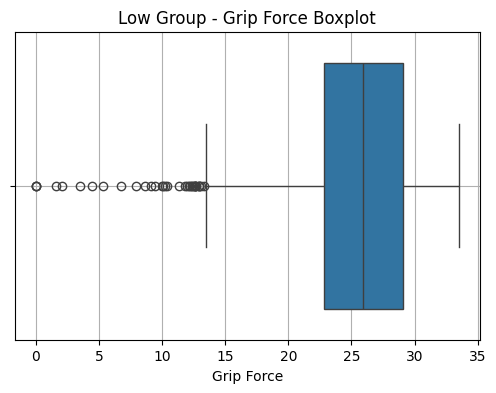

In [186]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=low_group['grip_force'])

plt.title("Low Group - Grip Force Boxplot")
plt.xlabel("Grip Force")
plt.grid(True)

plt.show()

In [187]:
# Önce low_group için IQR sınırlarını hesapla
Q1 = df[df['grip_force'] < intersection]['grip_force'].quantile(0.25)
Q3 = df[df['grip_force'] < intersection]['grip_force'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Bu sınırları tüm df üzerinde uygulayarak aykırıları sil
df = df[~((df['grip_force'] < intersection) & 
          ((df['grip_force'] < lower) | (df['grip_force'] > upper)))]


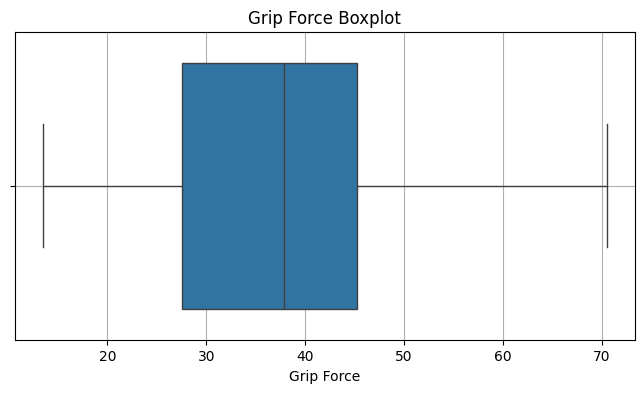

In [188]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['grip_force'])

plt.title("Grip Force Boxplot")
plt.xlabel("Grip Force")
plt.grid(True)

plt.show()

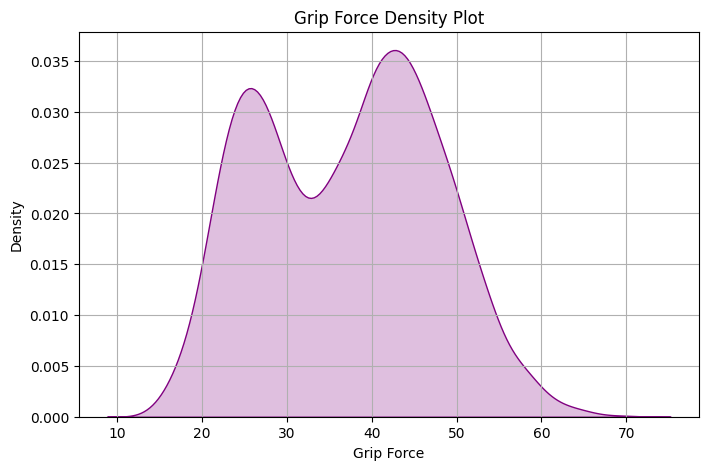

In [189]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df['grip_force'], fill=True, color='purple')
plt.title('Grip Force Density Plot')
plt.xlabel('Grip Force')
plt.ylabel('Density')
plt.grid(True)

plt.show()

broad_jump

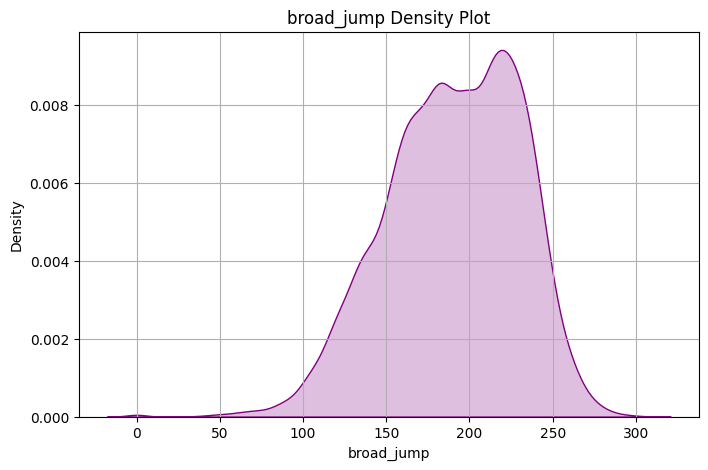

In [190]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df['broad_jump'], fill=True, color='purple')
plt.title('broad_jump Density Plot')
plt.xlabel('broad_jump')
plt.ylabel('Density')
plt.grid(True)

plt.show()

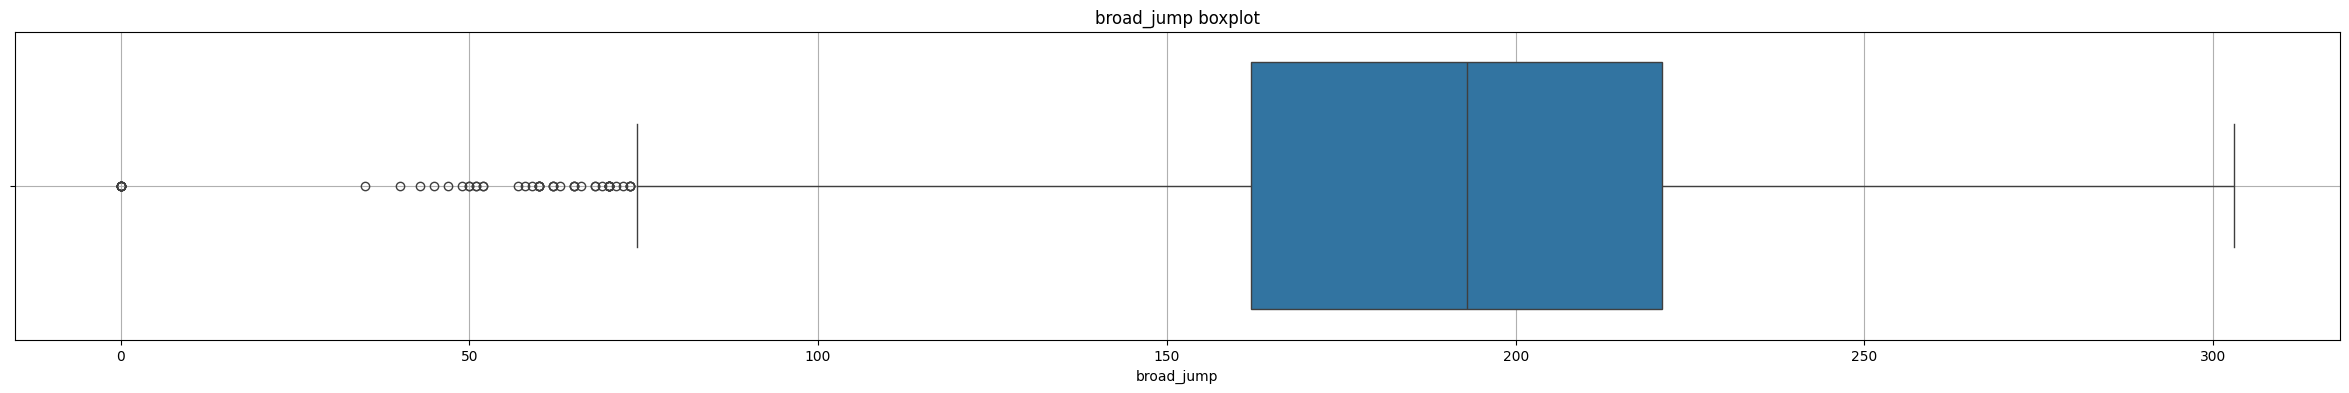

In [191]:
plt.figure(figsize=(30, 4))
sns.boxplot(x=df['broad_jump'])

plt.title("broad_jump boxplot")
plt.xlabel("broad_jump")
plt.grid(True)

plt.show()

In [192]:
Q1 = df['broad_jump'].quantile(0.25)
Q3 = df['broad_jump'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
print("Alt Sınır (Lower Bound):", lower_bound)

Alt Sınır (Lower Bound): 73.5


In [193]:
df[df['broad_jump'] < 73.5].shape[0]
df = df[df['broad_jump'] >= 73.5] #64 değeri siliyoruz

In [194]:
df['broad_jump'].value_counts()

broad_jump
211.0    181
220.0    176
230.0    172
180.0    161
200.0    157
        ... 
245.1      1
293.0      1
282.0      1
288.0      1
299.0      1
Name: count, Length: 220, dtype: int64

In [195]:
#broad_jump
df['broad_jump'].describe()

count    13305.000000
mean       190.824735
std         38.775459
min         74.000000
25%        163.000000
50%        193.000000
75%        222.000000
max        303.000000
Name: broad_jump, dtype: float64

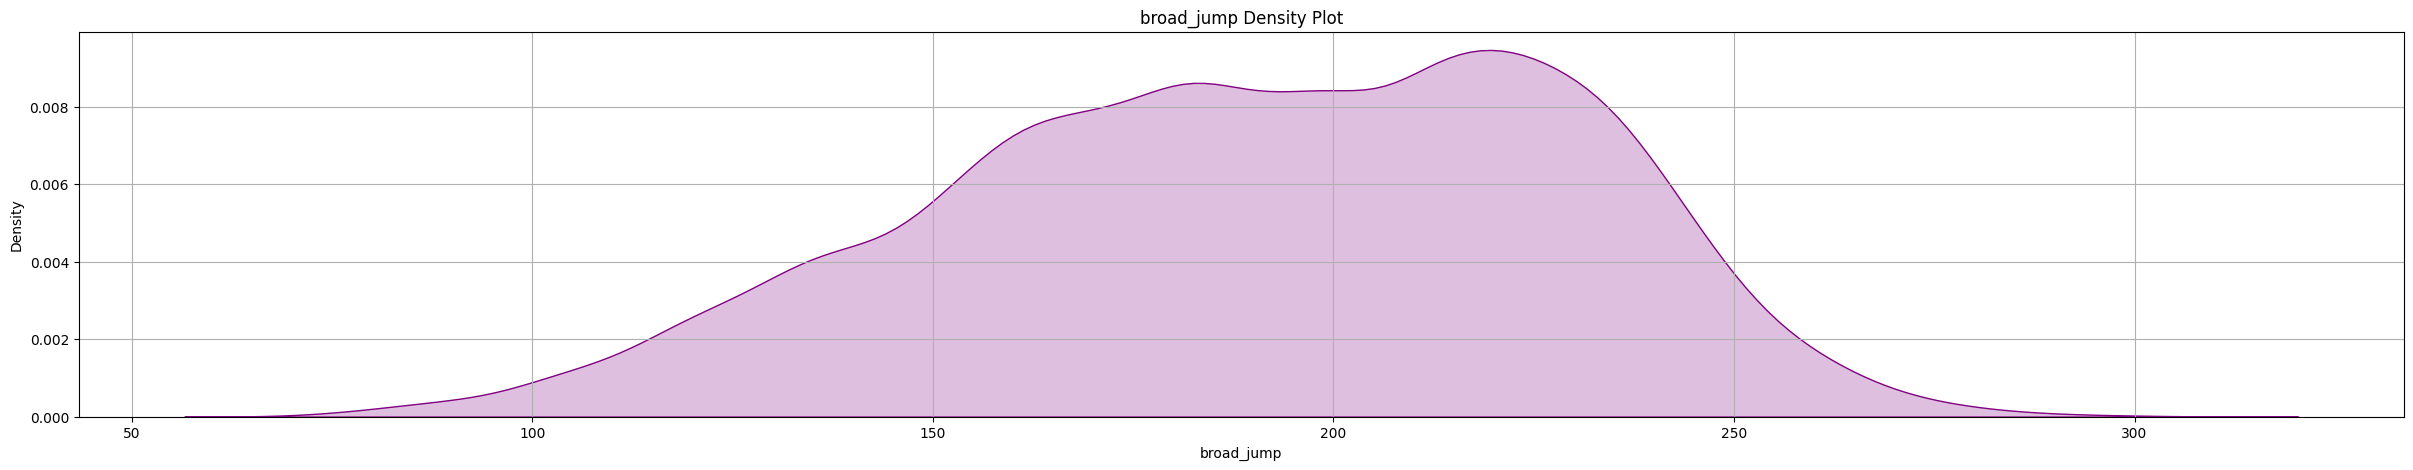

In [196]:
plt.figure(figsize=(30, 5))
sns.kdeplot(df['broad_jump'], fill=True, color='purple')
plt.title('broad_jump Density Plot')
plt.xlabel('broad_jump')
plt.ylabel('Density')
plt.grid(True)

plt.show()

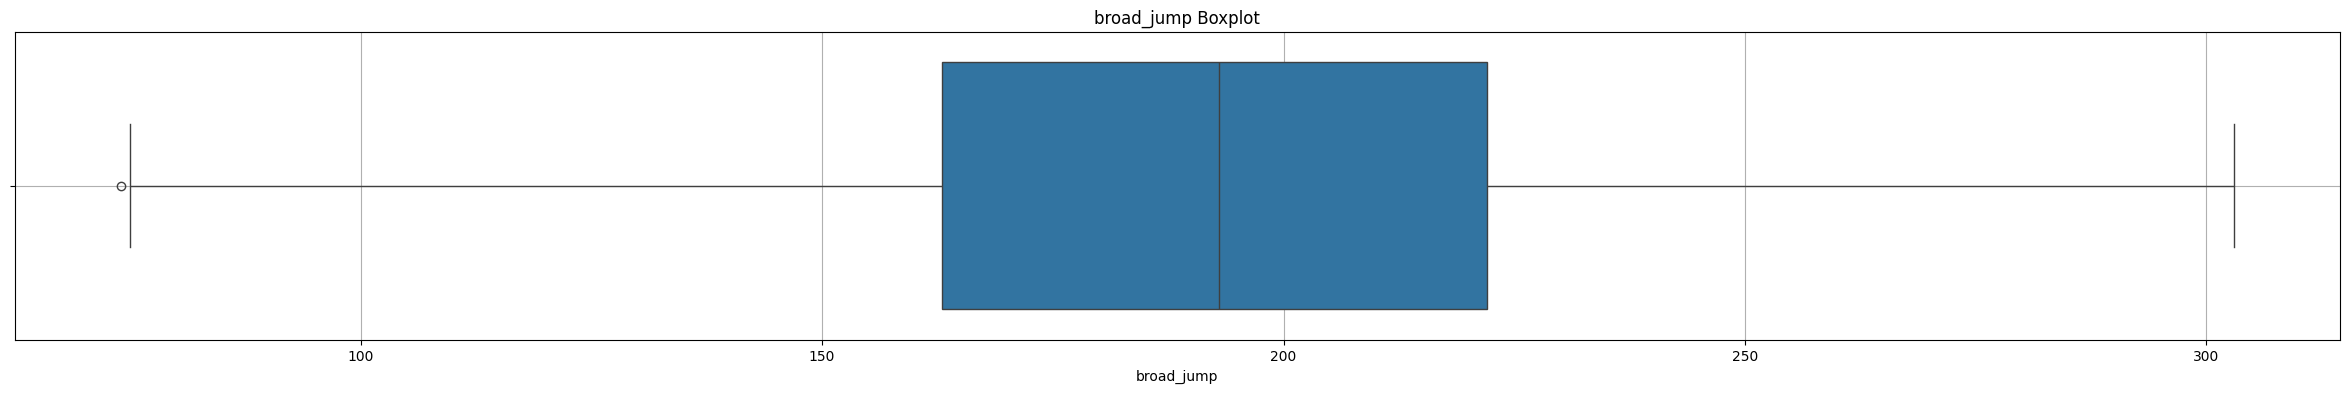

In [197]:
plt.figure(figsize=(30, 4))
sns.boxplot(x=df['broad_jump'])

plt.title("broad_jump Boxplot")
plt.xlabel("broad_jump")
plt.grid(True)

plt.show()

In [198]:
df.dtypes

age             float64
gender            int64
height          float64
weight          float64
body_fat        float64
diastolic       float64
systolic        float64
grip_force      float64
bend_forward    float64
sit_ups         float64
broad_jump      float64
class             int64
dtype: object

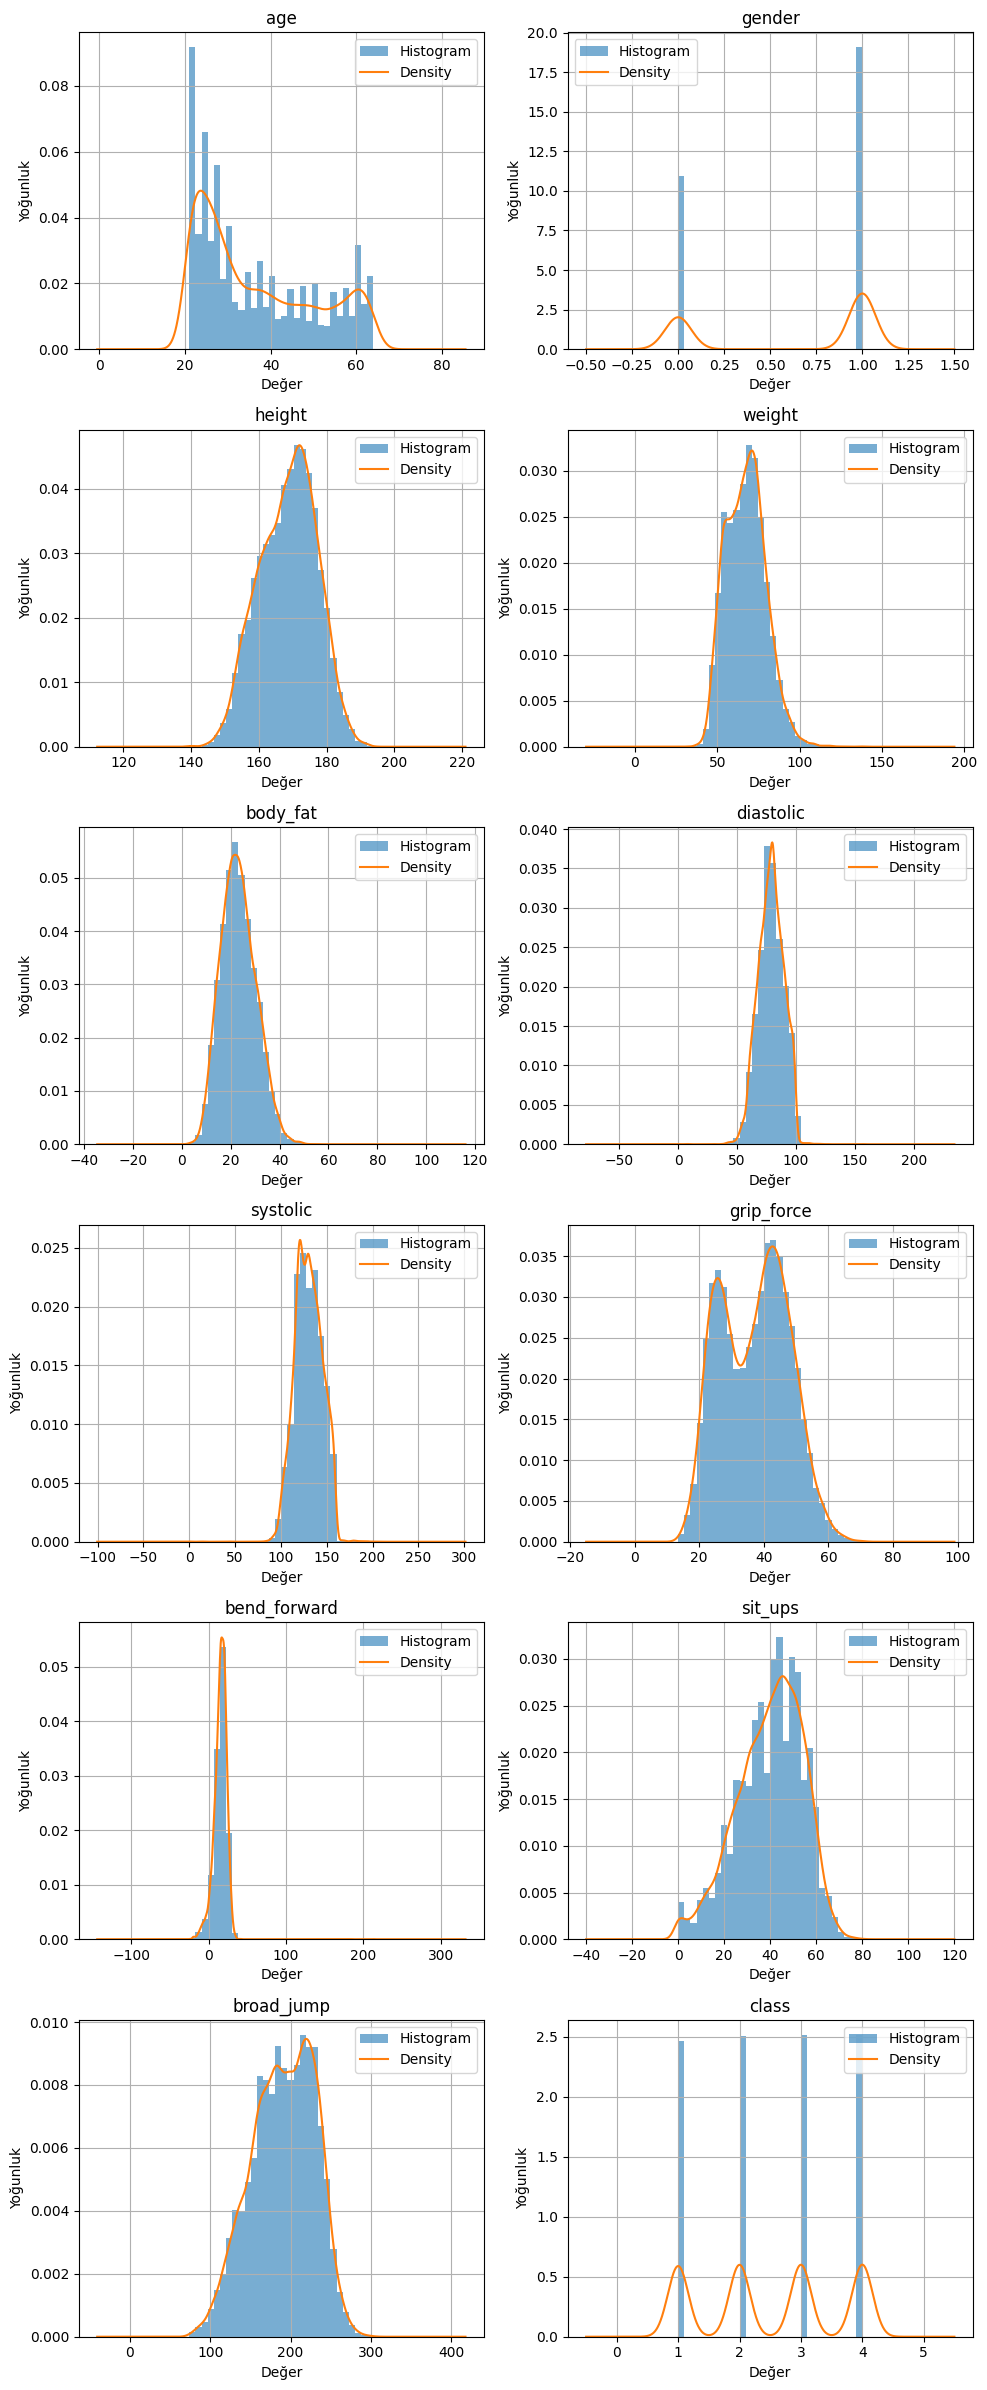

<Figure size 640x480 with 0 Axes>

In [199]:
num_columns = len(df.columns)
cols = 2
rows = math.ceil(num_columns/cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4)) #tüm figürün eksenlerinin genişlik yükseklik ayarını yaptık
axes = axes.flatten()# 5️⃣ axes dizisini düzleştir (flatten), böylece tek boyutlu liste gibi erişebiliriz, aksi halde axes[row][col] şeklinde erişmek gerekirdi

# Her sütun için ayrı subplot'ta hem histogram hem KDE çiz
for i, column in enumerate(df.columns):
    ax = axes[i] # İlgili subplot eksenini al
    # Histogram (density=True → toplam alan = 1)
    # kind='hist': histogram grafiği
    # bins=30: 30 aralık (bin) ile
    # density=True: toplam alan 1'e normalize edilir (KDE ile uyumlu)
    # alpha=0.6: yarı saydamlık (0=şeffaf, 1=opak)
    # ax=ax: bu grafiği ilgili subplot eksenine çiz
    # label='Histogram': legend'de görünecek isim
    df[column].plot(kind='hist', bins=30, density=True, alpha=0.6, ax=ax, label='Histogram')

    # KDE (density) eğrisi çiziyoruz:
    # kind='kde': yoğunluk fonksiyonu (pürüzsüz eğri)
    # ax=ax: yine aynı subplot'a çiz
    # label='Density': legend'de görünecek isim
    df[column].plot(kind='kde', ax=ax, label='Density')
    # Başlık ve etiketler
    ax.set_title(column)
    ax.set_xlabel('Değer')
    ax.set_ylabel('Yoğunluk')
    ax.legend()     # Legend ekliyoruz (hangi renk neyi temsil ediyor görünsün diye)
    ax.grid(True)

plt.tight_layout() # Grafikler arası boşlukları ve hizalamayı düzgün yapıyoruz
plt.show()
plt.savefig("data_processing_all_density_hist_subplots1.jpg", format='jpg', dpi=300)


height

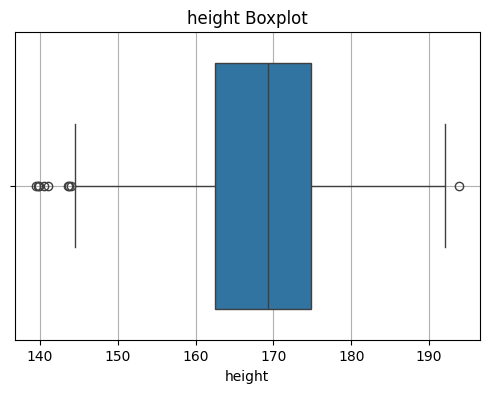

In [200]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['height'])

plt.title("height Boxplot")
plt.xlabel("height")
plt.grid(True)

plt.show()

In [201]:
df[df['height'] >= 190].shape[0]
df = df[df['height'] <= 190] #19 değeri siliyoruz


In [202]:
df[df['height']<148].shape[0] #50 değeri siliyoruz
df = df[df['height'] >= 148]

In [203]:
df = df[(df['height'] > 148) & (df['height'] < 190)]

print(df['height'].min(), df['height'].max())


148.1 189.9


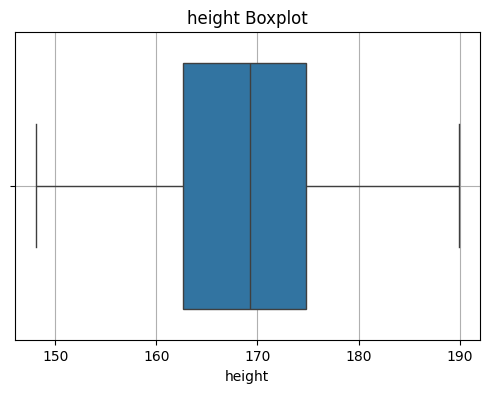

In [204]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['height'])

plt.title("height Boxplot")
plt.xlabel("height")
plt.grid(True)

plt.show()

weight

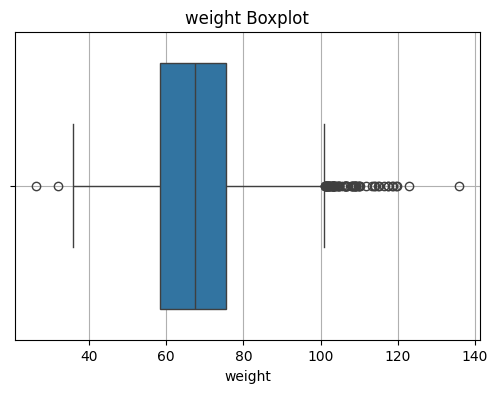

In [205]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['weight'])

plt.title("weight Boxplot")
plt.xlabel("weight")
plt.grid(True)

plt.show()

In [206]:
df[df['weight'] > 43].shape[0]
df = df[df['weight'] > 43] #44 değeri siliyoruz


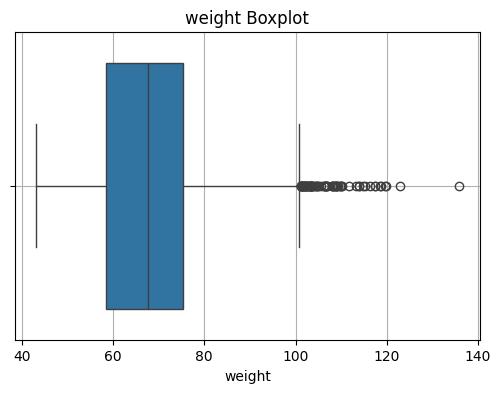

In [207]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['weight'])

plt.title("weight Boxplot")
plt.xlabel("weight")
plt.grid(True)

plt.show()

In [208]:
q1 = df['weight'].quantile(0.25)
q3 = df['weight'].quantile(0.75)
iqr = q3 - q1

upper_whisker = q3 + 1.5 * iqr
print("Boxplot Ust Sınır (upper Whisker):", upper_whisker)

Boxplot Ust Sınır (upper Whisker): 100.90000000000002


In [209]:
outlier_count = (df['weight'] > 100.3).sum()
print("Upper Whisker'dan büyük değer sayısı:", outlier_count)

Upper Whisker'dan büyük değer sayısı: 82


In [210]:
df = df[(df['weight'] <= 100.3)]

In [211]:
df.shape

(13097, 12)

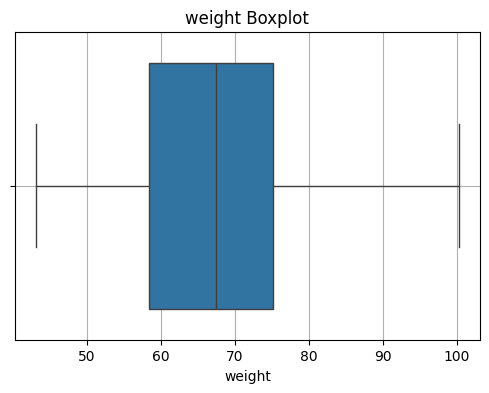

In [212]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['weight'])

plt.title("weight Boxplot")
plt.xlabel("weight")
plt.grid(True)

plt.show()

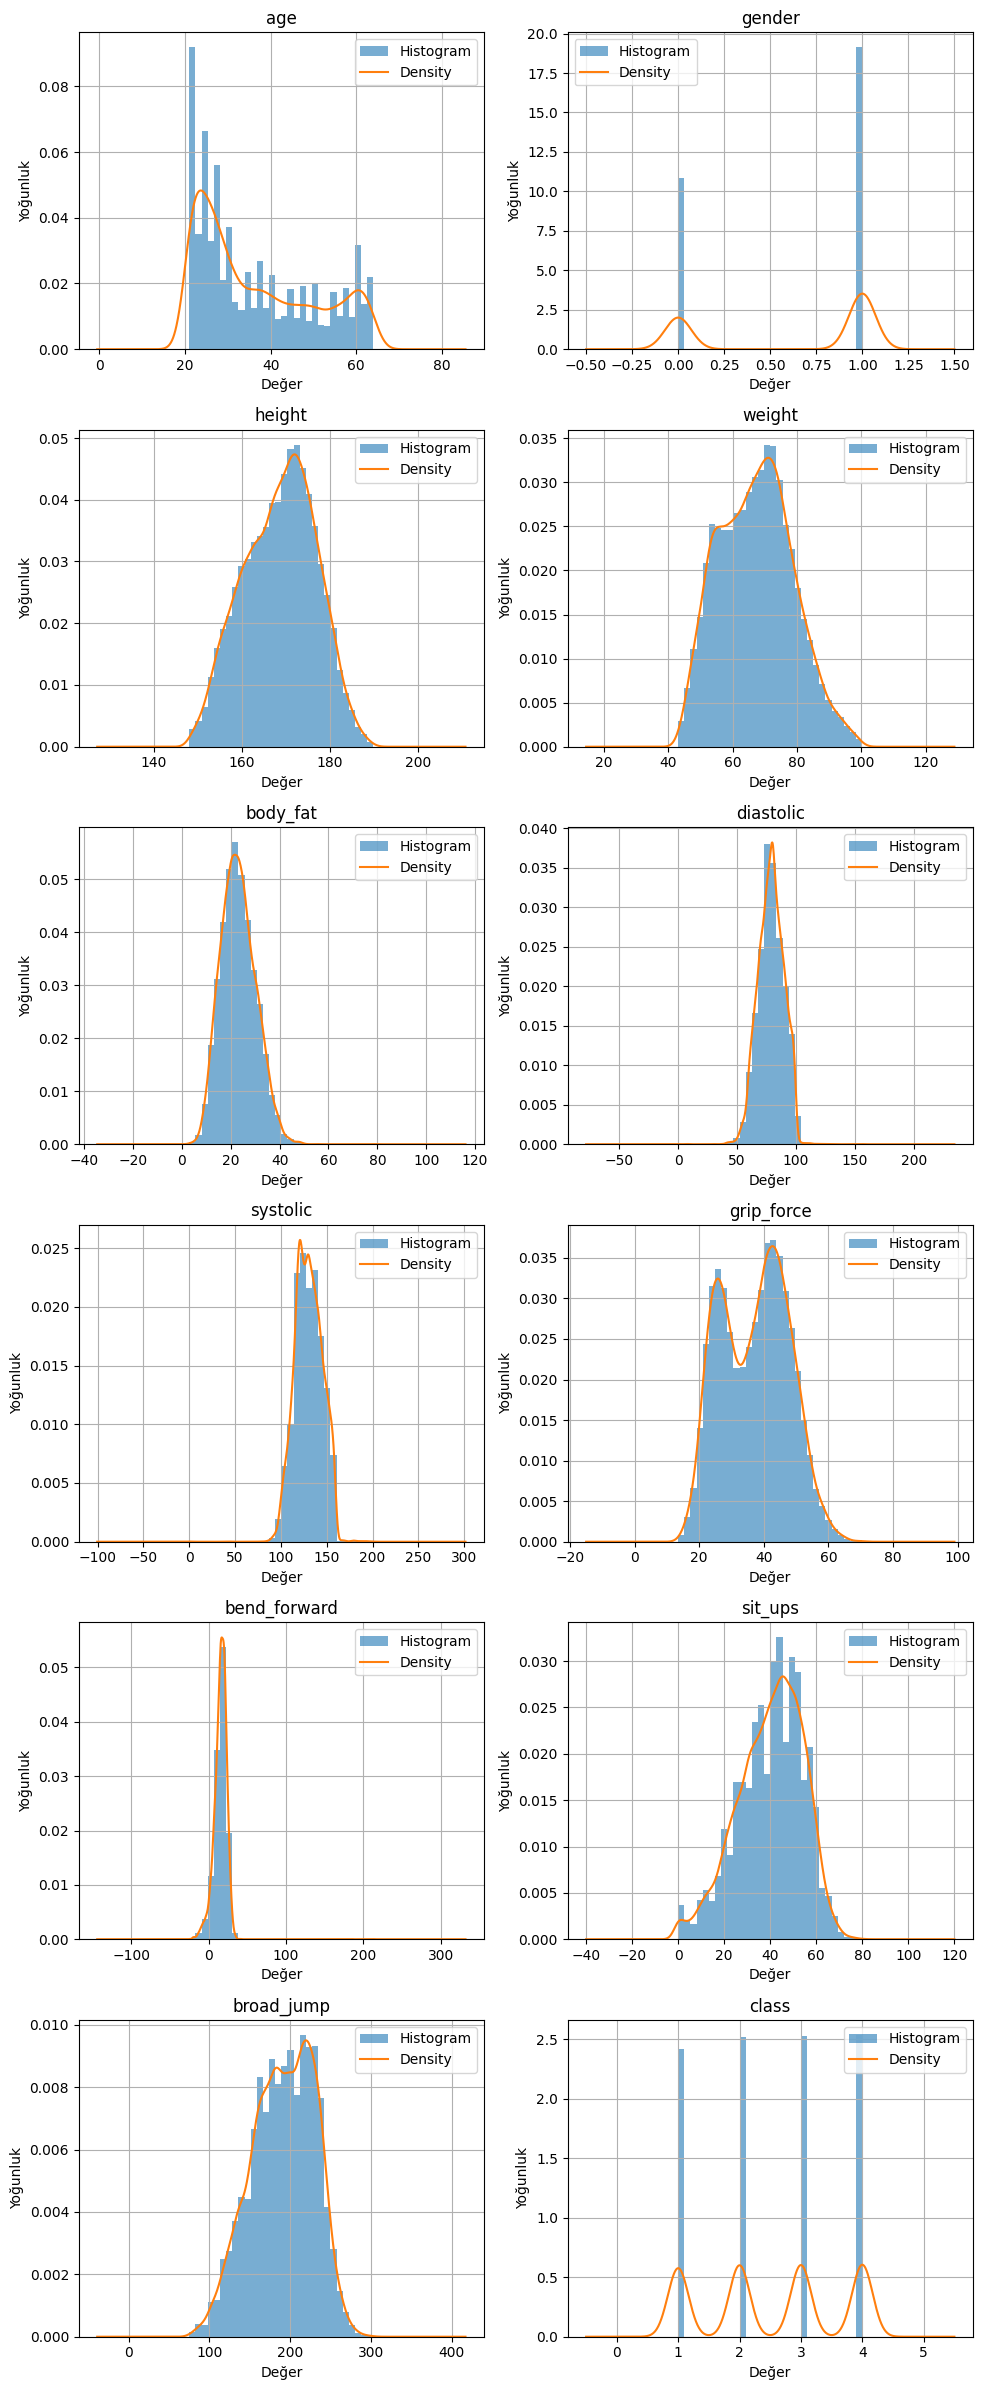

<Figure size 640x480 with 0 Axes>

In [213]:
num_columns = len(df.columns)
cols = 2
rows = math.ceil(num_columns/cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4)) #tüm figürün eksenlerinin genişlik yükseklik ayarını yaptık
axes = axes.flatten()# 5️⃣ axes dizisini düzleştir (flatten), böylece tek boyutlu liste gibi erişebiliriz, aksi halde axes[row][col] şeklinde erişmek gerekirdi

# Her sütun için ayrı subplot'ta hem histogram hem KDE çiz
for i, column in enumerate(df.columns):
    ax = axes[i] # İlgili subplot eksenini al
    # Histogram (density=True → toplam alan = 1)
    # kind='hist': histogram grafiği
    # bins=30: 30 aralık (bin) ile
    # density=True: toplam alan 1'e normalize edilir (KDE ile uyumlu)
    # alpha=0.6: yarı saydamlık (0=şeffaf, 1=opak)
    # ax=ax: bu grafiği ilgili subplot eksenine çiz
    # label='Histogram': legend'de görünecek isim
    df[column].plot(kind='hist', bins=30, density=True, alpha=0.6, ax=ax, label='Histogram')

    # KDE (density) eğrisi çiziyoruz:
    # kind='kde': yoğunluk fonksiyonu (pürüzsüz eğri)
    # ax=ax: yine aynı subplot'a çiz
    # label='Density': legend'de görünecek isim
    df[column].plot(kind='kde', ax=ax, label='Density')
    # Başlık ve etiketler
    ax.set_title(column)
    ax.set_xlabel('Değer')
    ax.set_ylabel('Yoğunluk')
    ax.legend()     # Legend ekliyoruz (hangi renk neyi temsil ediyor görünsün diye)
    ax.grid(True)

plt.tight_layout() # Grafikler arası boşlukları ve hizalamayı düzgün yapıyoruz
plt.show()
plt.savefig("data_processing_all_density_hist_subplots1.jpg", format='jpg', dpi=300)


In [214]:
df.shape

(13097, 12)

body_fat

In [215]:
df[df['body_fat'] > 43].shape[0]


56

In [216]:
df[df['body_fat'] < 4].shape[0]

4

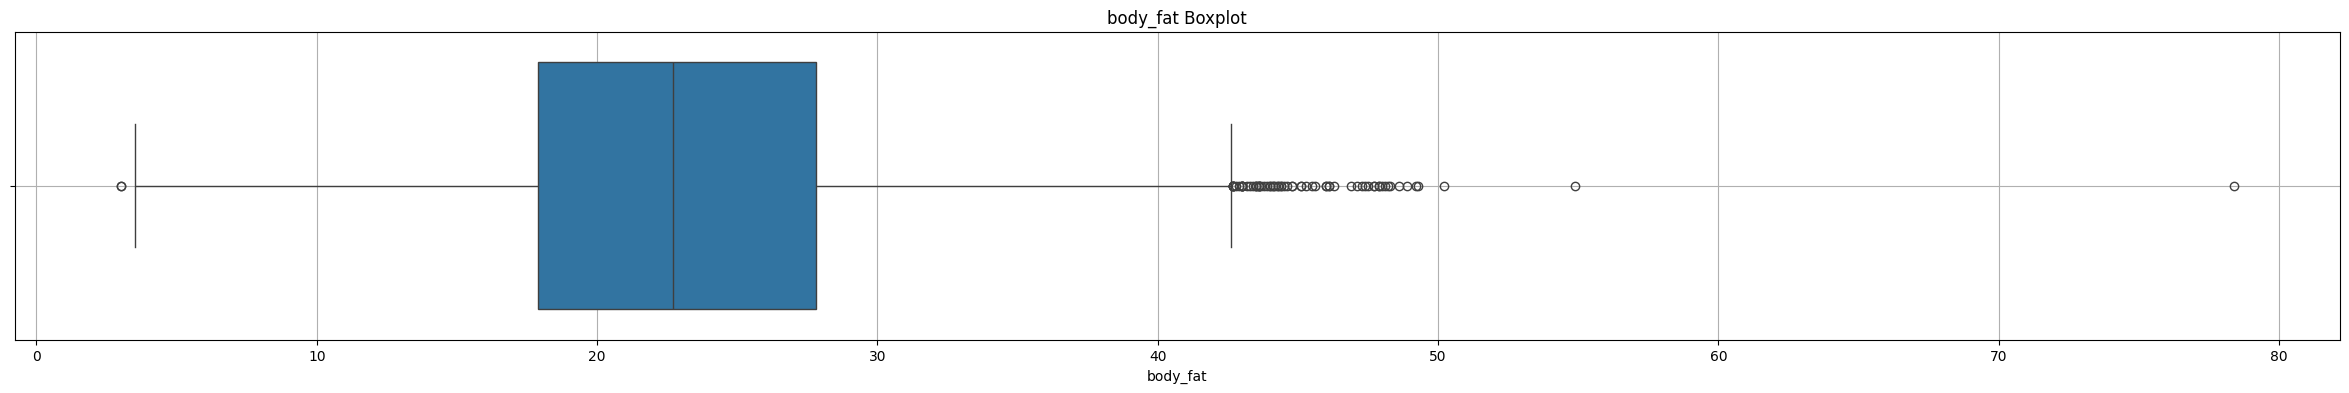

In [217]:
plt.figure(figsize=(30, 4))
sns.boxplot(x=df['body_fat'])

plt.title("body_fat Boxplot")
plt.xlabel("body_fat")
plt.grid(True)

plt.show()

In [218]:
q1 = df['body_fat'].quantile(0.25)
q3 = df['body_fat'].quantile(0.75)
iqr = q3 - q1

upper_whisker = q3 + 1.5 * iqr
lower_whisker = q1 - 1.5*iqr

print("Boxplot Ust Sınır (upper Whisker):", upper_whisker)
print("Boxplot alt Sınır (lower Whisker):", lower_whisker)

Boxplot Ust Sınır (upper Whisker): 42.650000000000006
Boxplot alt Sınır (lower Whisker): 3.0499999999999954


In [219]:
df = df[df['body_fat'] < 42.5] #76 değeri siliyoruz
df = df[df['body_fat'] > 4] #4 


In [220]:
df.shape

(13020, 12)

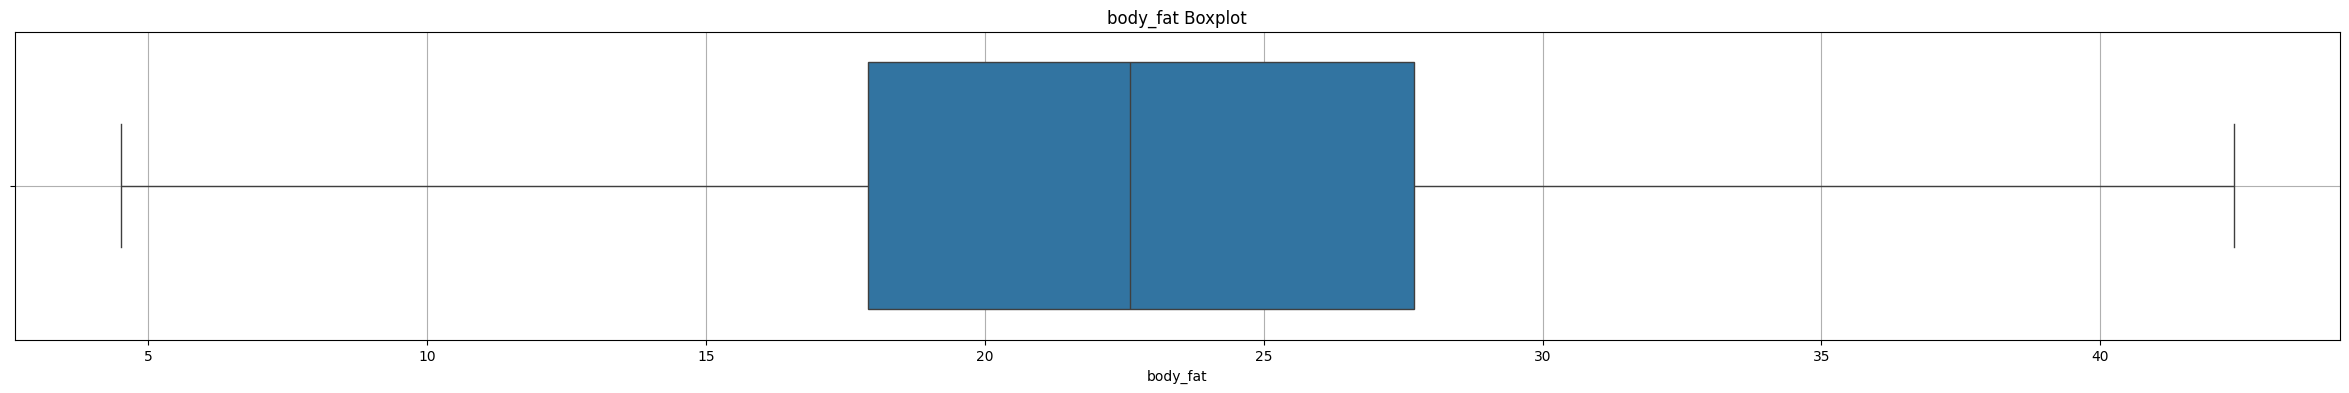

In [221]:
plt.figure(figsize=(30, 4))
sns.boxplot(x=df['body_fat'])

plt.title("body_fat Boxplot")
plt.xlabel("body_fat")
plt.grid(True)

plt.show()

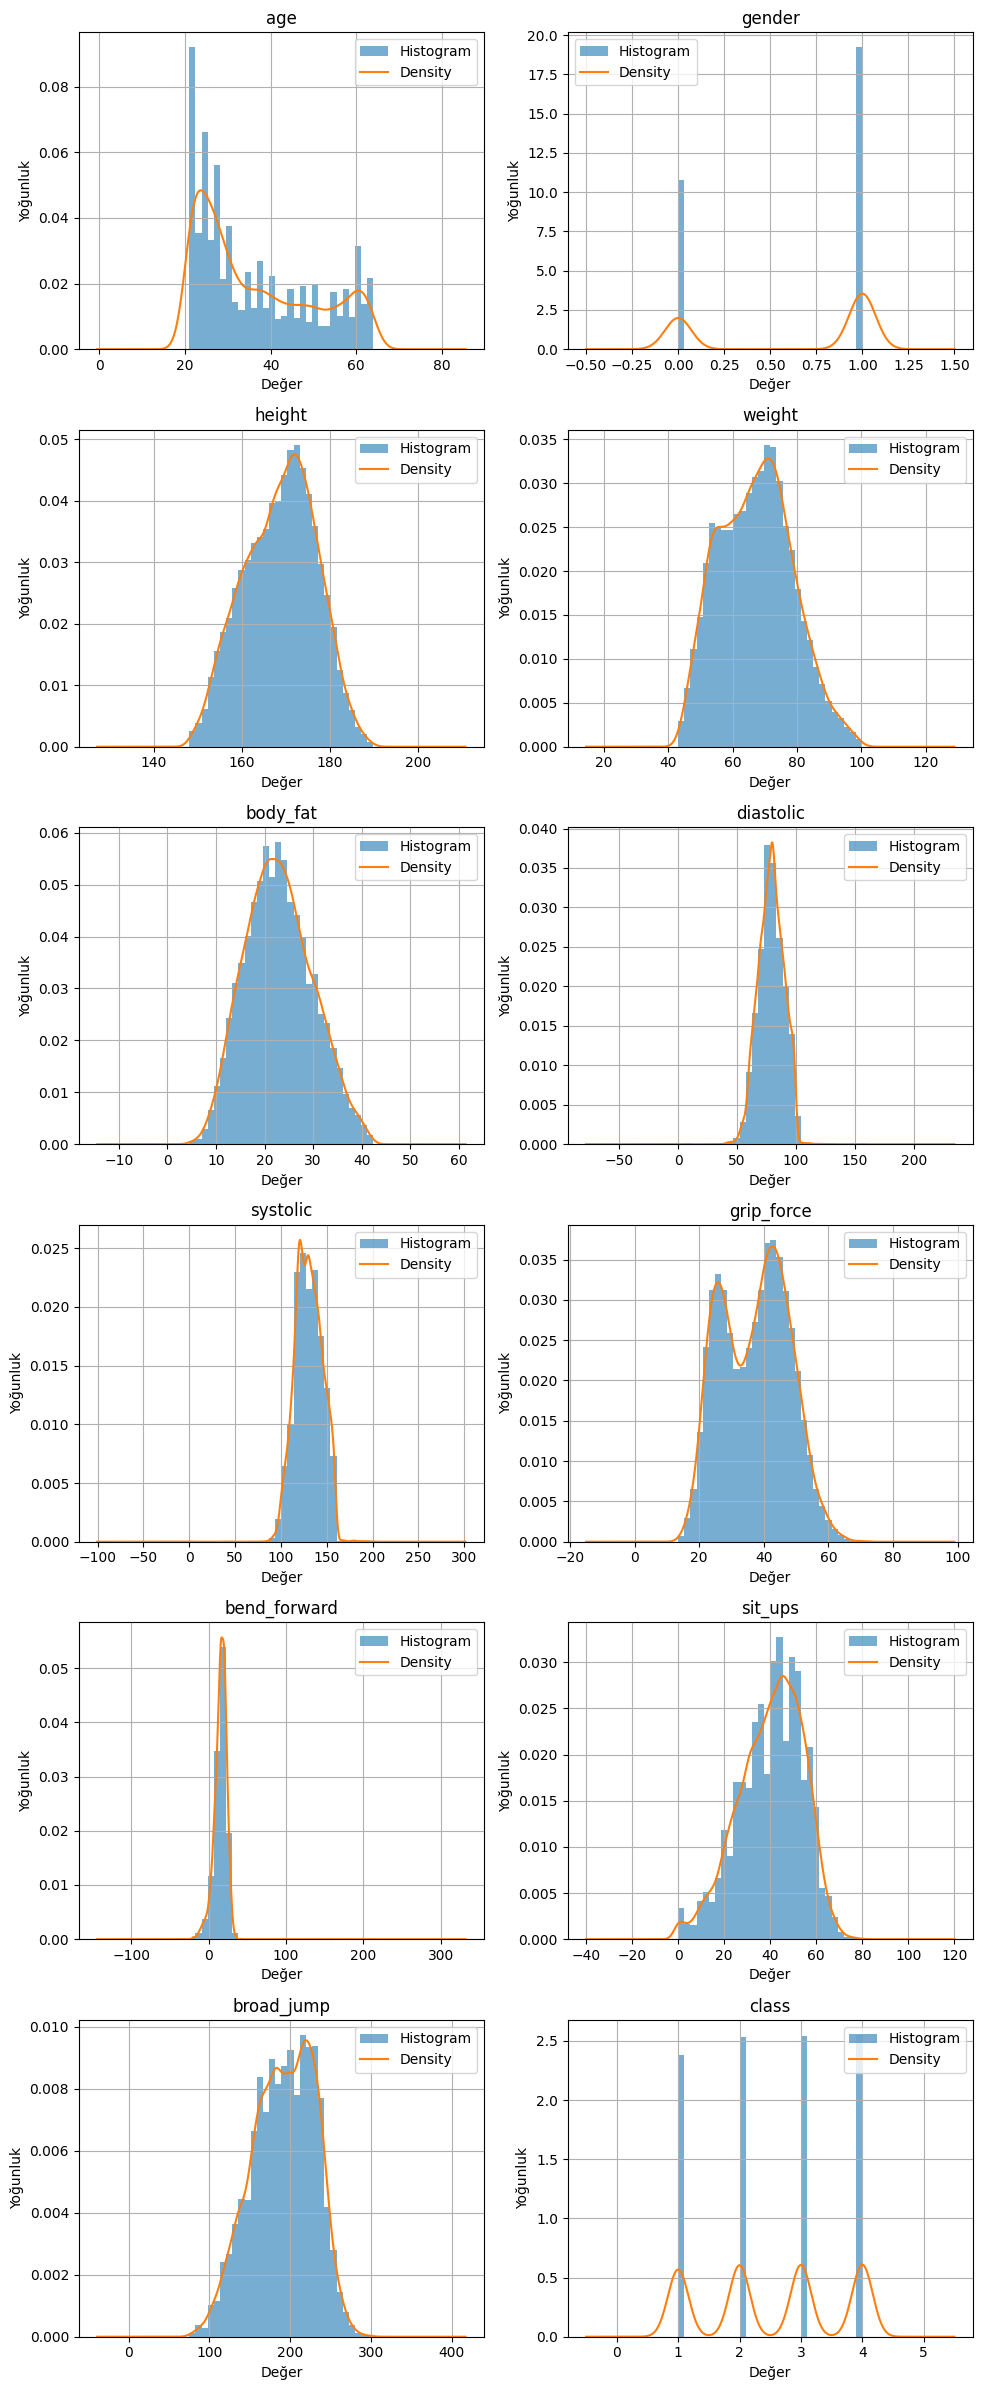

<Figure size 640x480 with 0 Axes>

In [222]:
num_columns = len(df.columns)
cols = 2
rows = math.ceil(num_columns/cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4)) #tüm figürün eksenlerinin genişlik yükseklik ayarını yaptık
axes = axes.flatten()# 5️⃣ axes dizisini düzleştir (flatten), böylece tek boyutlu liste gibi erişebiliriz, aksi halde axes[row][col] şeklinde erişmek gerekirdi

# Her sütun için ayrı subplot'ta hem histogram hem KDE çiz
for i, column in enumerate(df.columns):
    ax = axes[i] # İlgili subplot eksenini al
    # Histogram (density=True → toplam alan = 1)
    # kind='hist': histogram grafiği
    # bins=30: 30 aralık (bin) ile
    # density=True: toplam alan 1'e normalize edilir (KDE ile uyumlu)
    # alpha=0.6: yarı saydamlık (0=şeffaf, 1=opak)
    # ax=ax: bu grafiği ilgili subplot eksenine çiz
    # label='Histogram': legend'de görünecek isim
    df[column].plot(kind='hist', bins=30, density=True, alpha=0.6, ax=ax, label='Histogram')

    # KDE (density) eğrisi çiziyoruz:
    # kind='kde': yoğunluk fonksiyonu (pürüzsüz eğri)
    # ax=ax: yine aynı subplot'a çiz
    # label='Density': legend'de görünecek isim
    df[column].plot(kind='kde', ax=ax, label='Density')
    # Başlık ve etiketler
    ax.set_title(column)
    ax.set_xlabel('Değer')
    ax.set_ylabel('Yoğunluk')
    ax.legend()     # Legend ekliyoruz (hangi renk neyi temsil ediyor görünsün diye)
    ax.grid(True)

plt.tight_layout() # Grafikler arası boşlukları ve hizalamayı düzgün yapıyoruz
plt.show()
plt.savefig("data_processing_all_density_hist_subplots1.jpg", format='jpg', dpi=300)


In [223]:
df.shape

(13020, 12)

diastolic

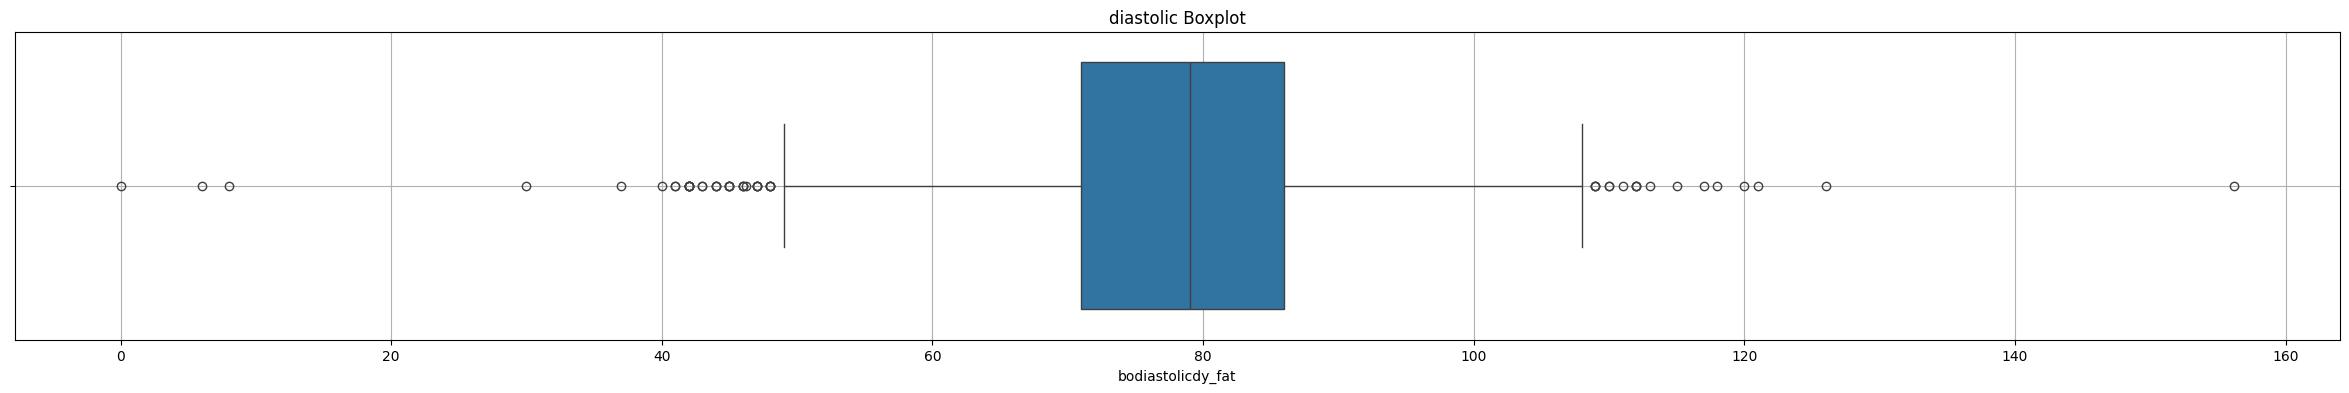

In [224]:
plt.figure(figsize=(30, 4))
sns.boxplot(x=df['diastolic'])

plt.title("diastolic Boxplot")
plt.xlabel("bodiastolicdy_fat")
plt.grid(True)

plt.show()

In [225]:
q1 = df['diastolic'].quantile(0.25)
q3 = df['diastolic'].quantile(0.75)
iqr = q3 - q1

upper_whisker = q3 + 1.5 * iqr
lower_whisker = q1 - 1.5*iqr

print("Boxplot Ust Sınır (upper Whisker):", upper_whisker)
print("Boxplot alt Sınır (lower Whisker):", lower_whisker)

Boxplot Ust Sınır (upper Whisker): 108.5
Boxplot alt Sınır (lower Whisker): 48.5


In [226]:
df[df['diastolic'] > 108.5].shape[0]

17

In [227]:
df[df['diastolic'] < 48.5].shape[0]

35

In [228]:
df = df[(df['diastolic'] > 48.5) & (df['diastolic'] < 108.5)]

print(df['diastolic'].min(), df['diastolic'].max())


49.0 108.0


In [229]:
df.shape

(12968, 12)

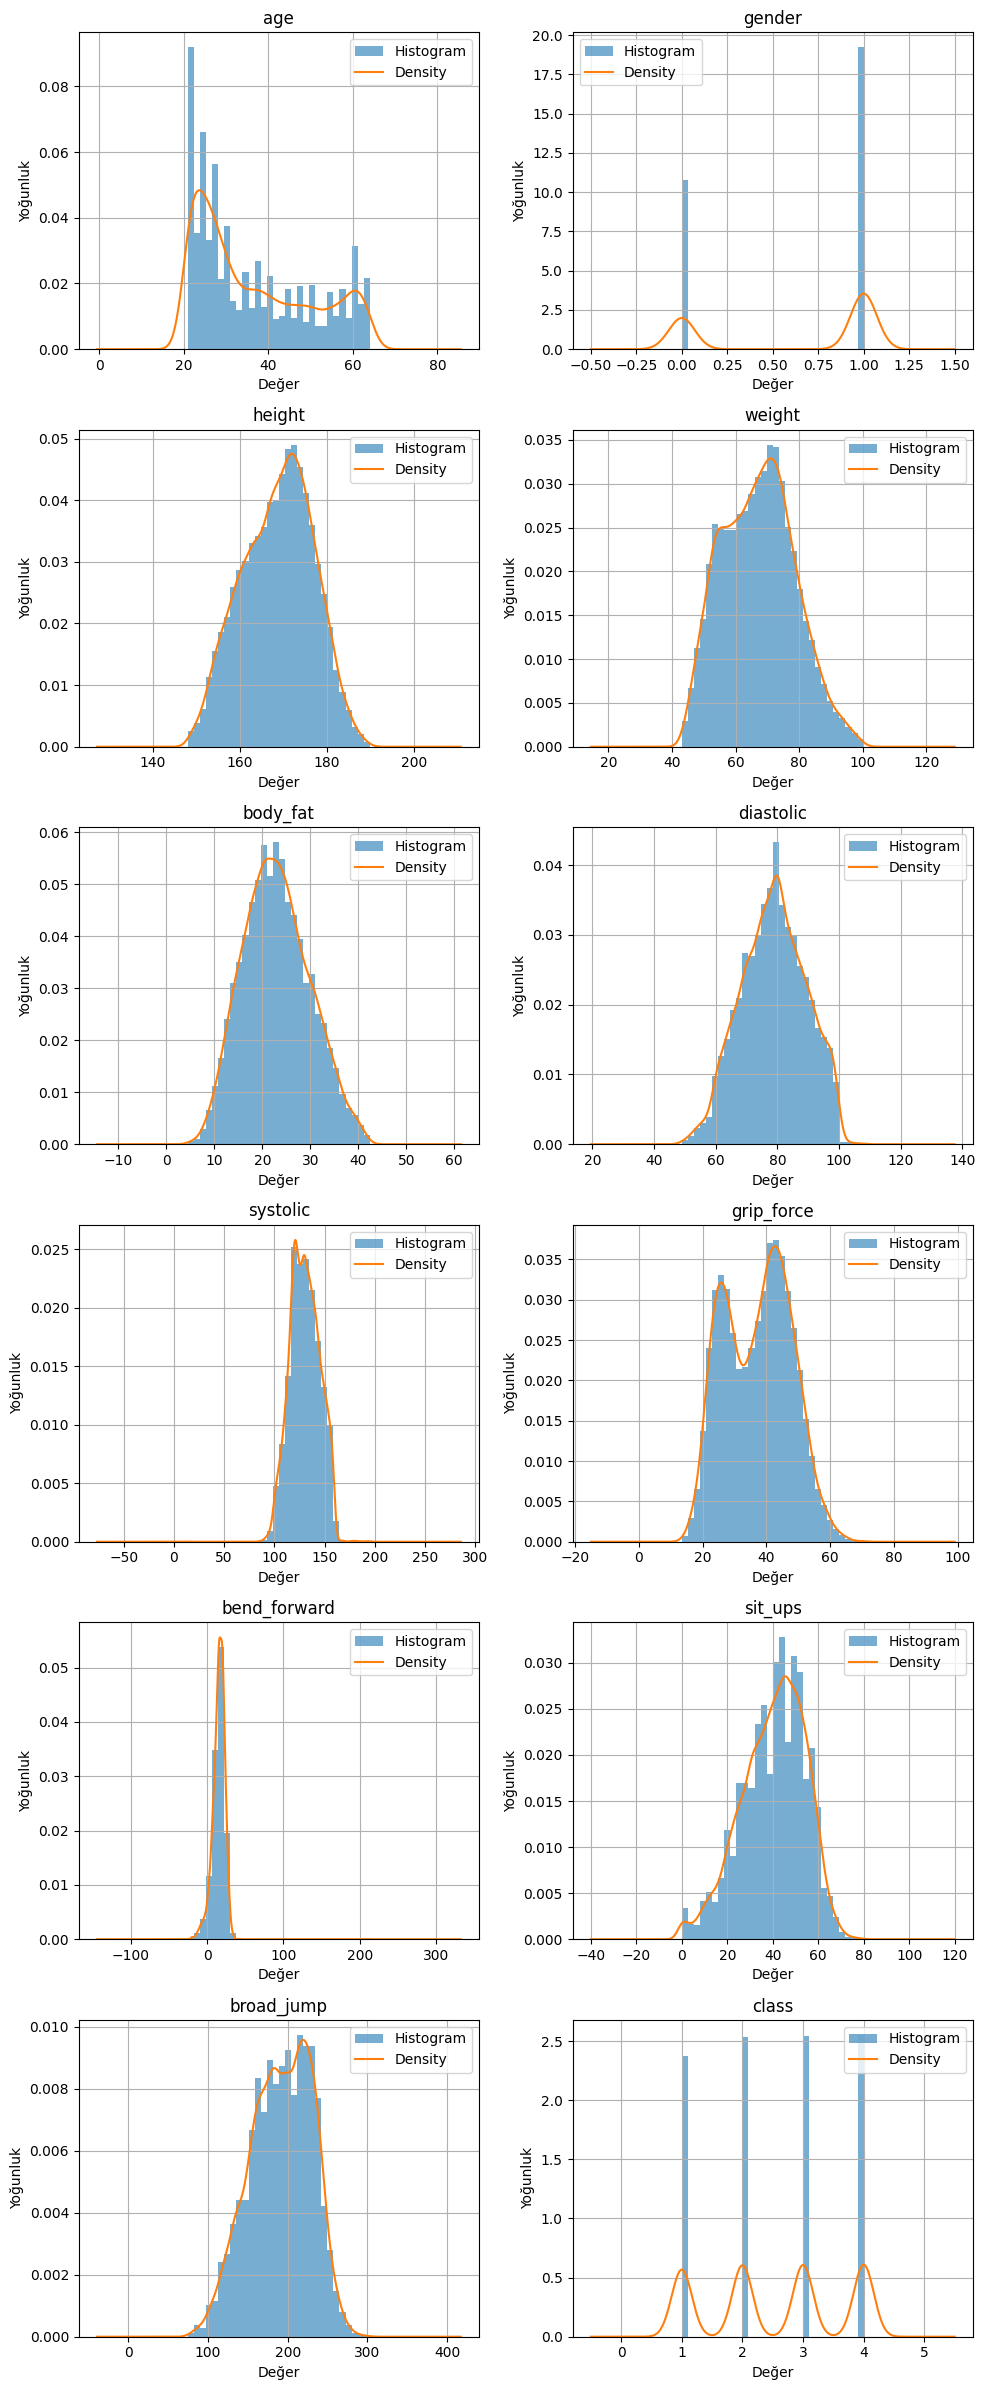

<Figure size 640x480 with 0 Axes>

In [230]:
num_columns = len(df.columns)
cols = 2
rows = math.ceil(num_columns/cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4)) #tüm figürün eksenlerinin genişlik yükseklik ayarını yaptık
axes = axes.flatten()# 5️⃣ axes dizisini düzleştir (flatten), böylece tek boyutlu liste gibi erişebiliriz, aksi halde axes[row][col] şeklinde erişmek gerekirdi

# Her sütun için ayrı subplot'ta hem histogram hem KDE çiz
for i, column in enumerate(df.columns):
    ax = axes[i] # İlgili subplot eksenini al
    # Histogram (density=True → toplam alan = 1)
    # kind='hist': histogram grafiği
    # bins=30: 30 aralık (bin) ile
    # density=True: toplam alan 1'e normalize edilir (KDE ile uyumlu)
    # alpha=0.6: yarı saydamlık (0=şeffaf, 1=opak)
    # ax=ax: bu grafiği ilgili subplot eksenine çiz
    # label='Histogram': legend'de görünecek isim
    df[column].plot(kind='hist', bins=30, density=True, alpha=0.6, ax=ax, label='Histogram')

    # KDE (density) eğrisi çiziyoruz:
    # kind='kde': yoğunluk fonksiyonu (pürüzsüz eğri)
    # ax=ax: yine aynı subplot'a çiz
    # label='Density': legend'de görünecek isim
    df[column].plot(kind='kde', ax=ax, label='Density')
    # Başlık ve etiketler
    ax.set_title(column)
    ax.set_xlabel('Değer')
    ax.set_ylabel('Yoğunluk')
    ax.legend()     # Legend ekliyoruz (hangi renk neyi temsil ediyor görünsün diye)
    ax.grid(True)

plt.tight_layout() # Grafikler arası boşlukları ve hizalamayı düzgün yapıyoruz
plt.show()
plt.savefig("data_processing_all_density_hist_subplots1.jpg", format='jpg', dpi=300)


systolic

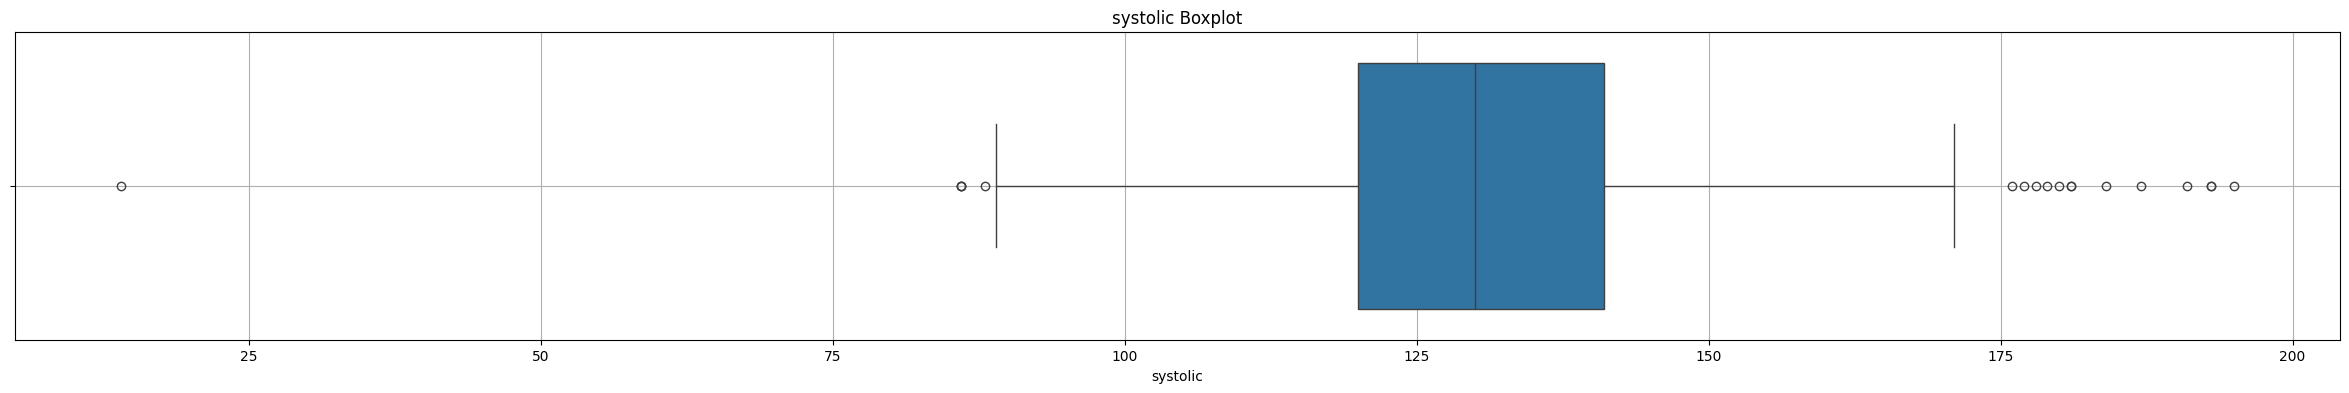

In [231]:
plt.figure(figsize=(30, 4))
sns.boxplot(x=df['systolic'])

plt.title("systolic Boxplot")
plt.xlabel("systolic")
plt.grid(True)

plt.show()

In [232]:
df = df[(df['systolic'] > 85)]


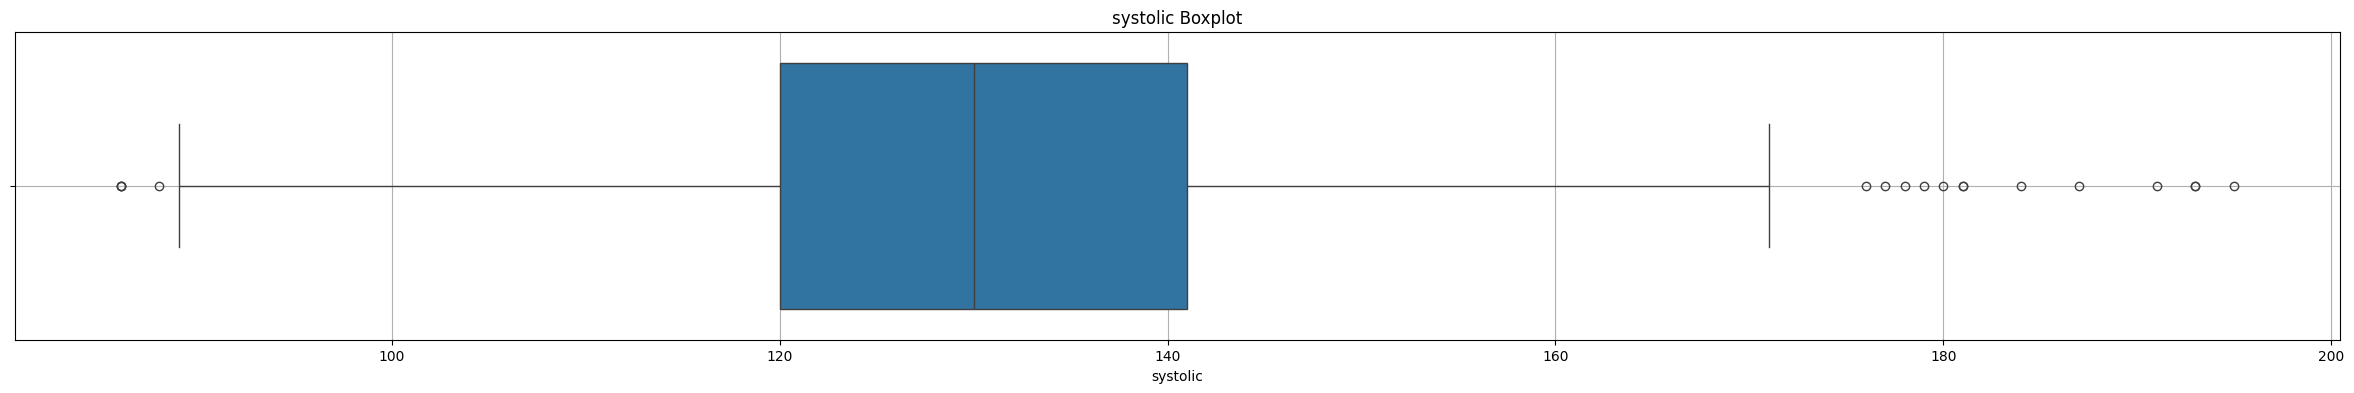

In [233]:
plt.figure(figsize=(30, 4))
sns.boxplot(x=df['systolic'])

plt.title("systolic Boxplot")
plt.xlabel("systolic")
plt.grid(True)

plt.show()

In [234]:
q1 = df['systolic'].quantile(0.25)
q3 = df['systolic'].quantile(0.75)
iqr = q3 - q1

upper_whisker = q3 + 1.5 * iqr
lower_whisker = q1 - 1.5*iqr

print("Boxplot Ust Sınır (upper Whisker):", upper_whisker)
print("Boxplot alt Sınır (lower Whisker):", lower_whisker)

Boxplot Ust Sınır (upper Whisker): 172.5
Boxplot alt Sınır (lower Whisker): 88.5


In [235]:
df[df['systolic'] < 88.5].shape[0]

4

In [236]:
df[df['systolic'] > 172.5].shape[0]

13

In [237]:
df['systolic'] = df['systolic'].apply(
    lambda x: lower_whisker if x < lower_whisker else
              upper_whisker if x > upper_whisker else x
)

In [238]:
"""df = df[(df['systolic'] > 88.5) & (df['systolic'] < 172.5)]

print(df['systolic'].min(), df['systolic'].max())
"""

"df = df[(df['systolic'] > 88.5) & (df['systolic'] < 172.5)]\n\nprint(df['systolic'].min(), df['systolic'].max())\n"

In [239]:
df.shape

(12967, 12)

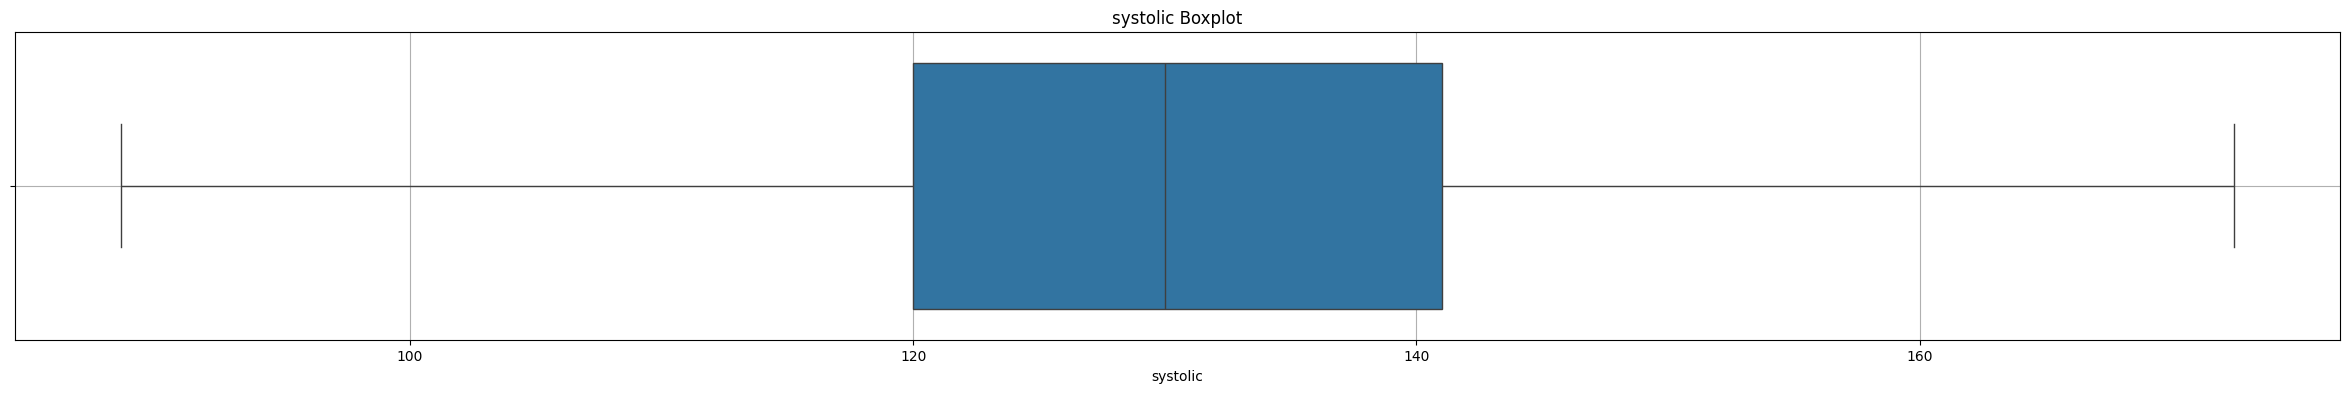

In [240]:
plt.figure(figsize=(30, 4))
sns.boxplot(x=df['systolic'])

plt.title("systolic Boxplot")
plt.xlabel("systolic")
plt.grid(True)

plt.show()

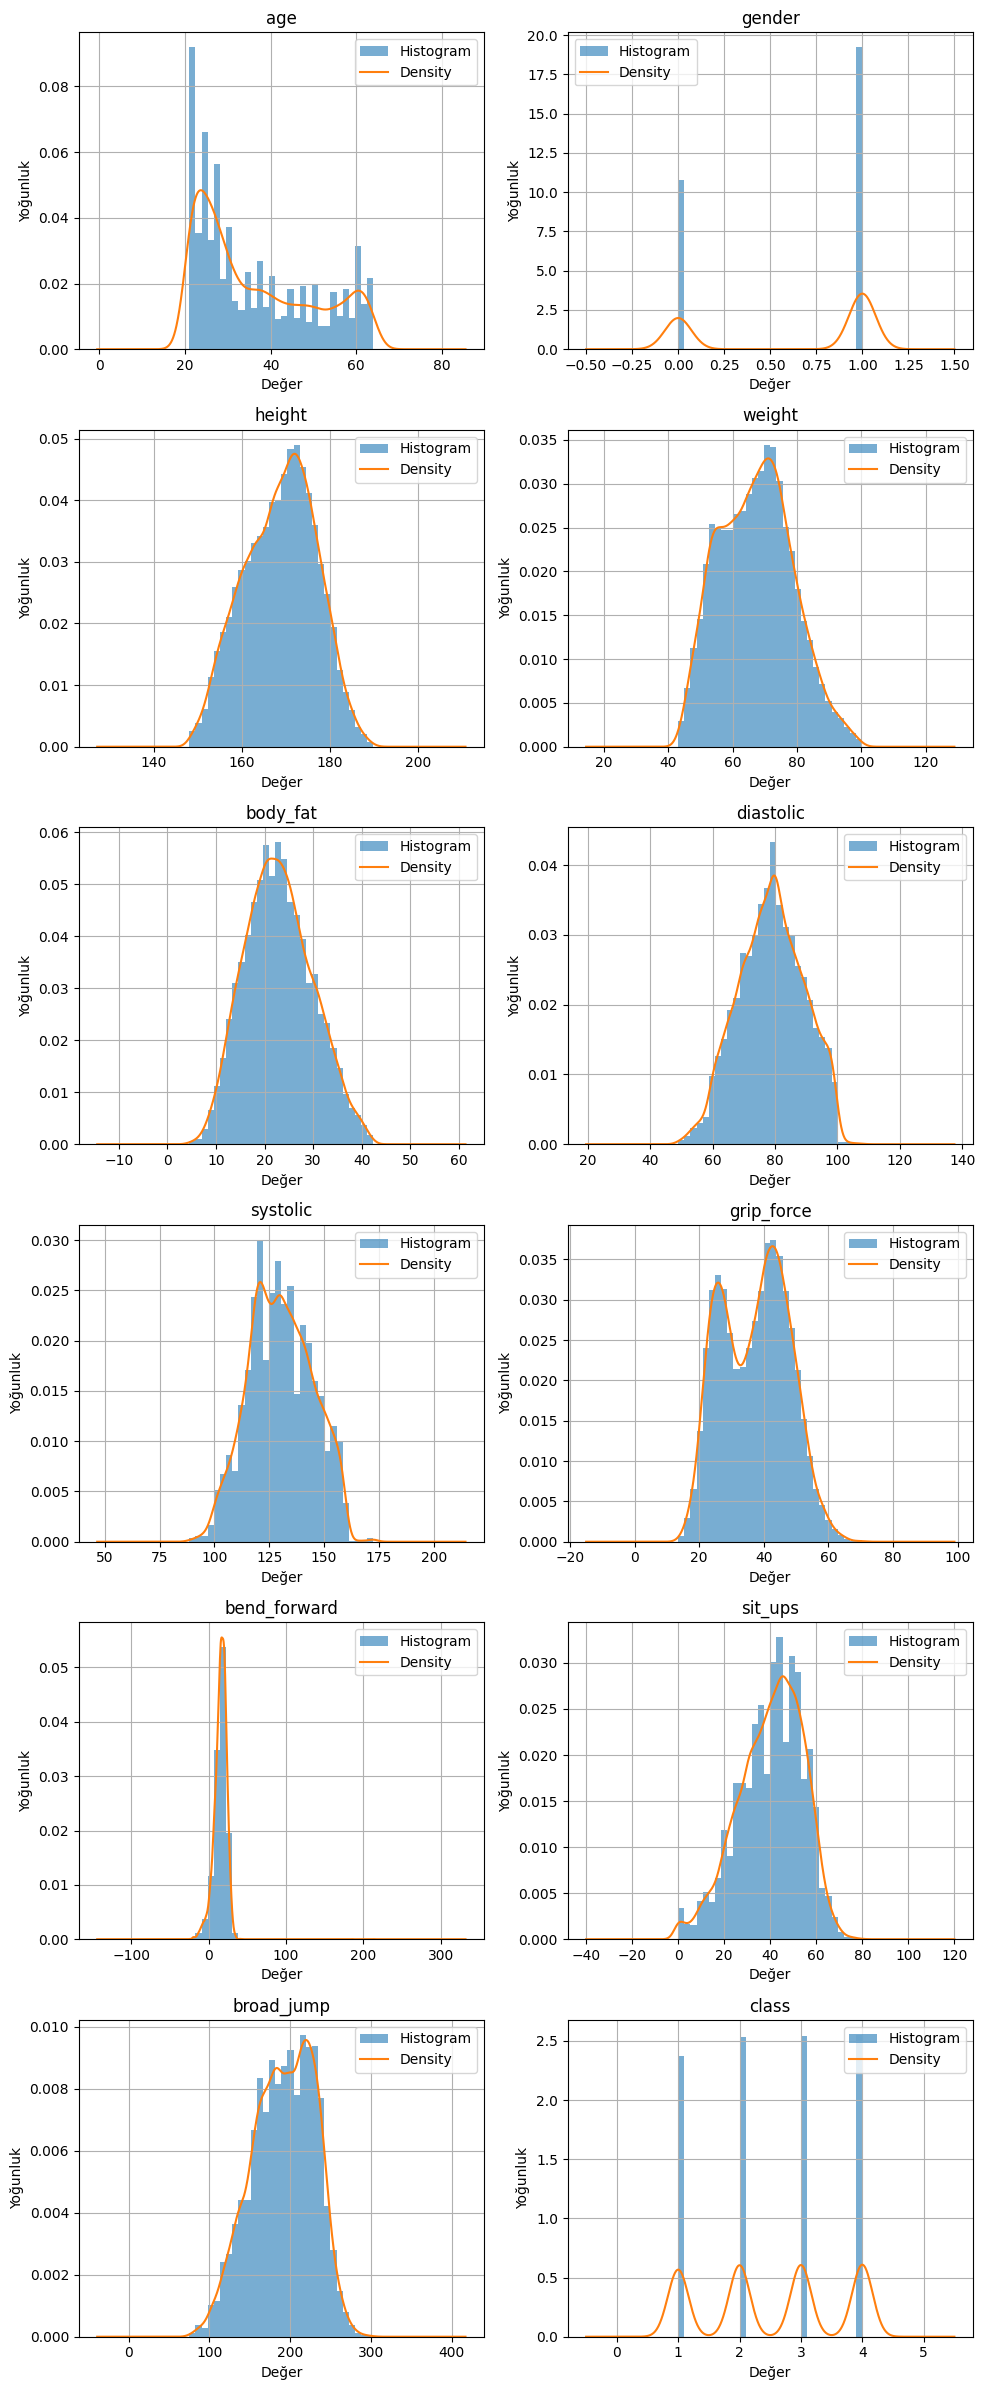

<Figure size 640x480 with 0 Axes>

In [241]:
num_columns = len(df.columns)
cols = 2
rows = math.ceil(num_columns/cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4)) #tüm figürün eksenlerinin genişlik yükseklik ayarını yaptık
axes = axes.flatten()# 5️⃣ axes dizisini düzleştir (flatten), böylece tek boyutlu liste gibi erişebiliriz, aksi halde axes[row][col] şeklinde erişmek gerekirdi

# Her sütun için ayrı subplot'ta hem histogram hem KDE çiz
for i, column in enumerate(df.columns):
    ax = axes[i] # İlgili subplot eksenini al
    # Histogram (density=True → toplam alan = 1)
    # kind='hist': histogram grafiği
    # bins=30: 30 aralık (bin) ile
    # density=True: toplam alan 1'e normalize edilir (KDE ile uyumlu)
    # alpha=0.6: yarı saydamlık (0=şeffaf, 1=opak)
    # ax=ax: bu grafiği ilgili subplot eksenine çiz
    # label='Histogram': legend'de görünecek isim
    df[column].plot(kind='hist', bins=30, density=True, alpha=0.6, ax=ax, label='Histogram')

    # KDE (density) eğrisi çiziyoruz:
    # kind='kde': yoğunluk fonksiyonu (pürüzsüz eğri)
    # ax=ax: yine aynı subplot'a çiz
    # label='Density': legend'de görünecek isim
    df[column].plot(kind='kde', ax=ax, label='Density')
    # Başlık ve etiketler
    ax.set_title(column)
    ax.set_xlabel('Değer')
    ax.set_ylabel('Yoğunluk')
    ax.legend()     # Legend ekliyoruz (hangi renk neyi temsil ediyor görünsün diye)
    ax.grid(True)

plt.tight_layout() # Grafikler arası boşlukları ve hizalamayı düzgün yapıyoruz
plt.show()
plt.savefig("data_processing_all_density_hist_subplots1.jpg", format='jpg', dpi=300)


bend_forward

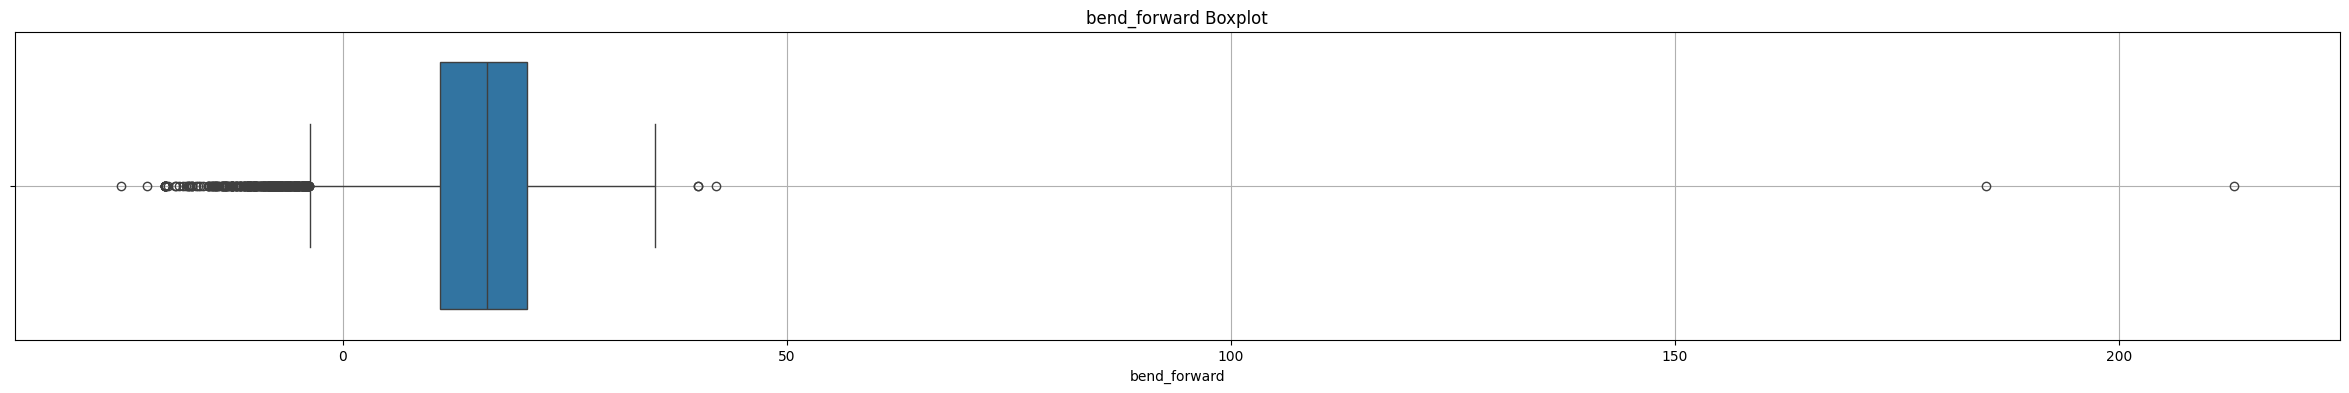

In [242]:
plt.figure(figsize=(30, 4))
sns.boxplot(x=df['bend_forward'])

plt.title("bend_forward Boxplot")
plt.xlabel("bend_forward")
plt.grid(True)

plt.show()

In [243]:
df[df['bend_forward'] > 35].count()

age             10
gender          10
height          10
weight          10
body_fat        10
diastolic       10
systolic        10
grip_force      10
bend_forward    10
sit_ups         10
broad_jump      10
class           10
dtype: int64

In [244]:
df[df['bend_forward'] < -20].count()

age             2
gender          2
height          2
weight          2
body_fat        2
diastolic       2
systolic        2
grip_force      2
bend_forward    2
sit_ups         2
broad_jump      2
class           2
dtype: int64

In [245]:
df = df[df['bend_forward'] < 35] #76 değeri siliyoruz

In [246]:
df = df[df['bend_forward'] > -20] #76 değeri siliyoruz

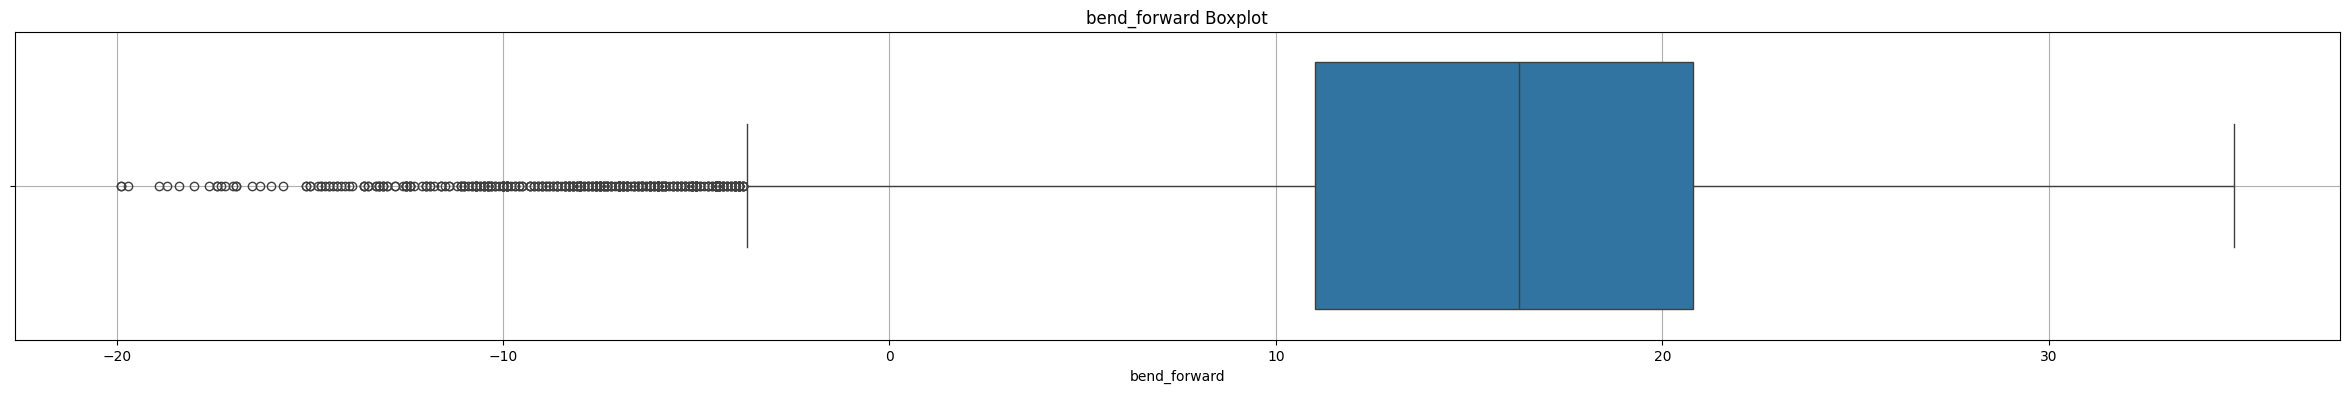

In [247]:
plt.figure(figsize=(30, 4))
sns.boxplot(x=df['bend_forward'])

plt.title("bend_forward Boxplot")
plt.xlabel("bend_forward")
plt.grid(True)

plt.show()

In [248]:
#buradaki aykırı değerlere karışmayıp standardize edeceğiz

sit_ups

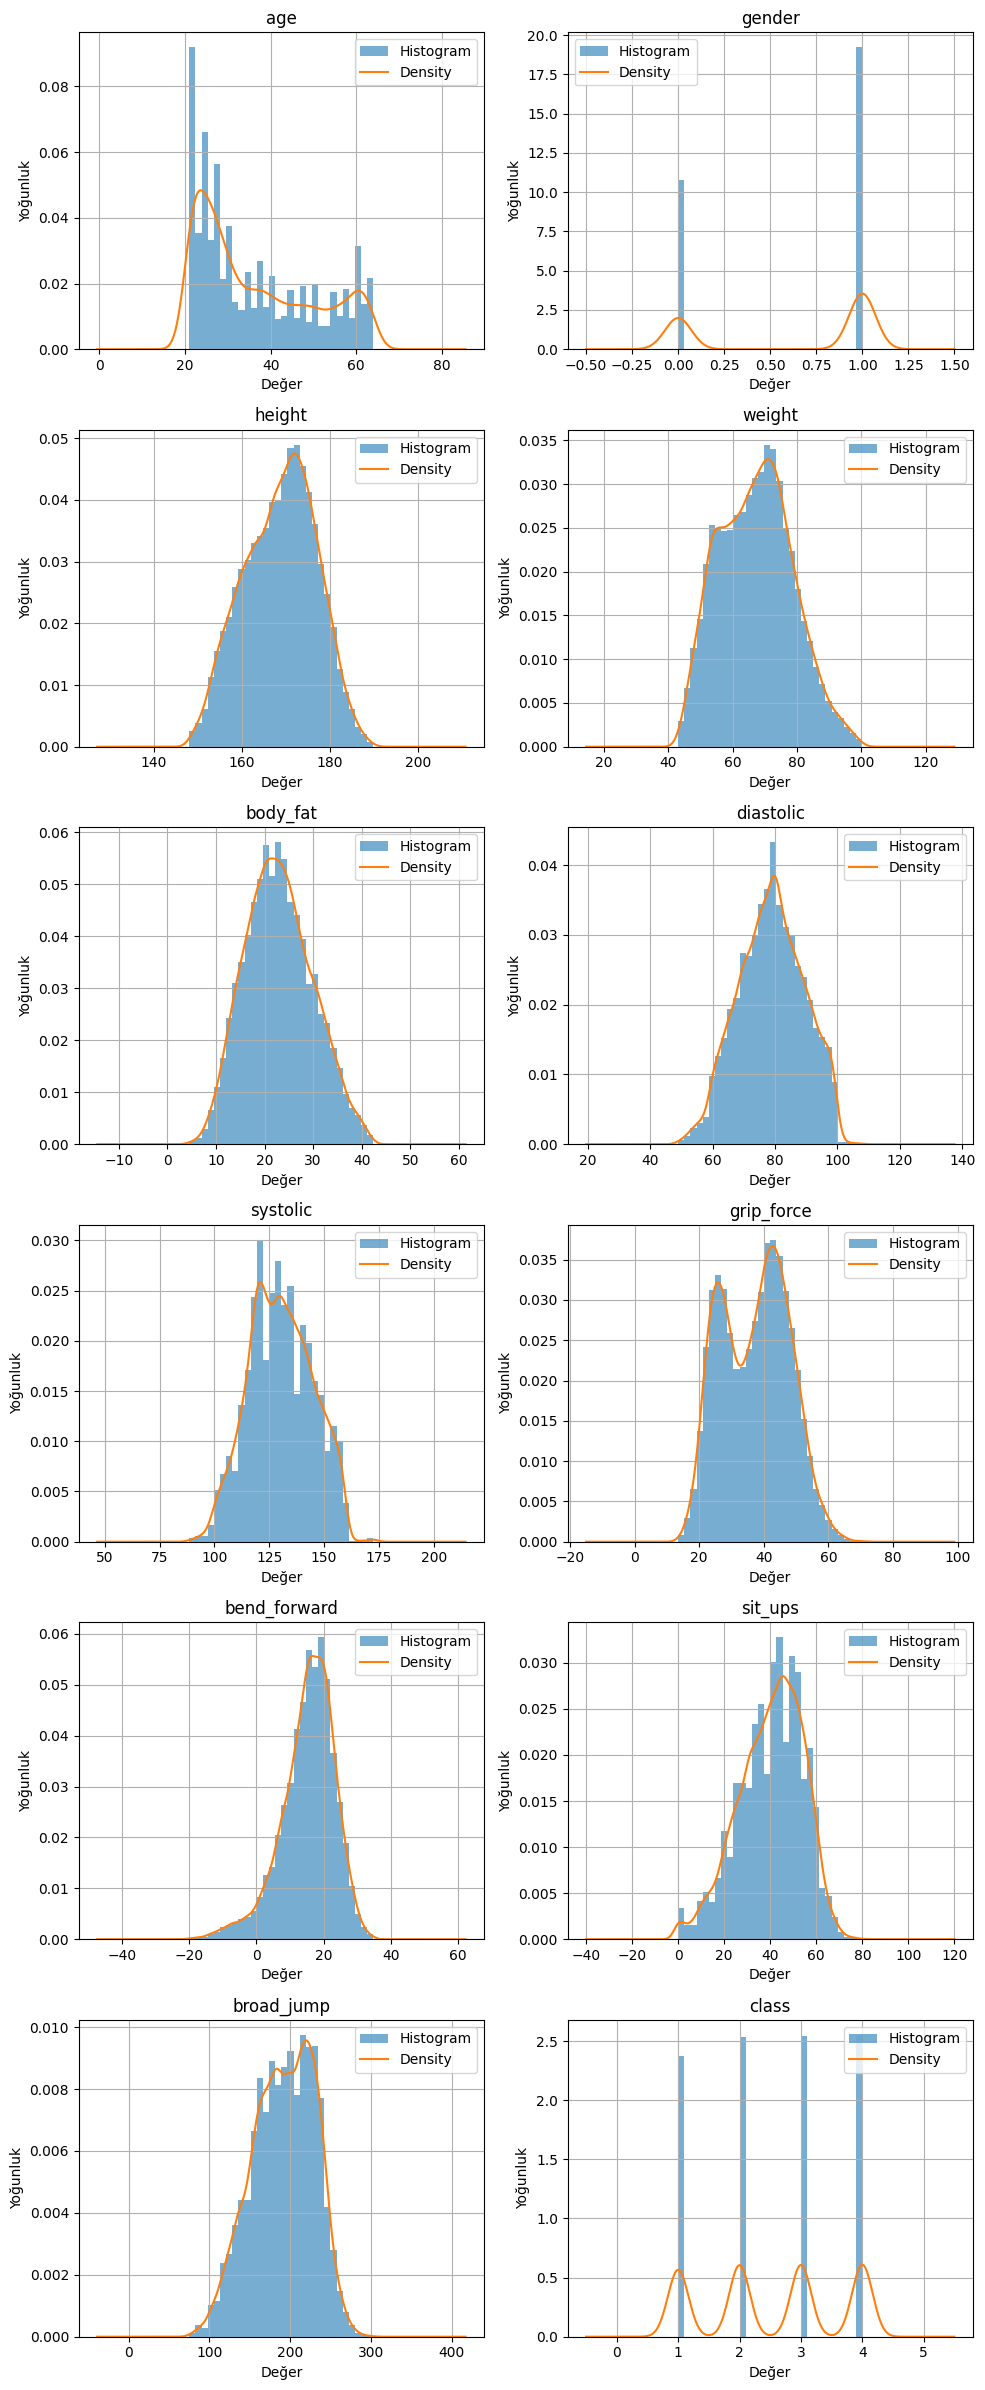

<Figure size 640x480 with 0 Axes>

In [249]:
num_columns = len(df.columns)
cols = 2
rows = math.ceil(num_columns/cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4)) #tüm figürün eksenlerinin genişlik yükseklik ayarını yaptık
axes = axes.flatten()# 5️⃣ axes dizisini düzleştir (flatten), böylece tek boyutlu liste gibi erişebiliriz, aksi halde axes[row][col] şeklinde erişmek gerekirdi

# Her sütun için ayrı subplot'ta hem histogram hem KDE çiz
for i, column in enumerate(df.columns):
    ax = axes[i] # İlgili subplot eksenini al
    # Histogram (density=True → toplam alan = 1)
    # kind='hist': histogram grafiği
    # bins=30: 30 aralık (bin) ile
    # density=True: toplam alan 1'e normalize edilir (KDE ile uyumlu)
    # alpha=0.6: yarı saydamlık (0=şeffaf, 1=opak)
    # ax=ax: bu grafiği ilgili subplot eksenine çiz
    # label='Histogram': legend'de görünecek isim
    df[column].plot(kind='hist', bins=30, density=True, alpha=0.6, ax=ax, label='Histogram')

    # KDE (density) eğrisi çiziyoruz:
    # kind='kde': yoğunluk fonksiyonu (pürüzsüz eğri)
    # ax=ax: yine aynı subplot'a çiz
    # label='Density': legend'de görünecek isim
    df[column].plot(kind='kde', ax=ax, label='Density')
    # Başlık ve etiketler
    ax.set_title(column)
    ax.set_xlabel('Değer')
    ax.set_ylabel('Yoğunluk')
    ax.legend()     # Legend ekliyoruz (hangi renk neyi temsil ediyor görünsün diye)
    ax.grid(True)

plt.tight_layout() # Grafikler arası boşlukları ve hizalamayı düzgün yapıyoruz
plt.show()
plt.savefig("data_processing_all_density_hist_subplots1.jpg", format='jpg', dpi=300)


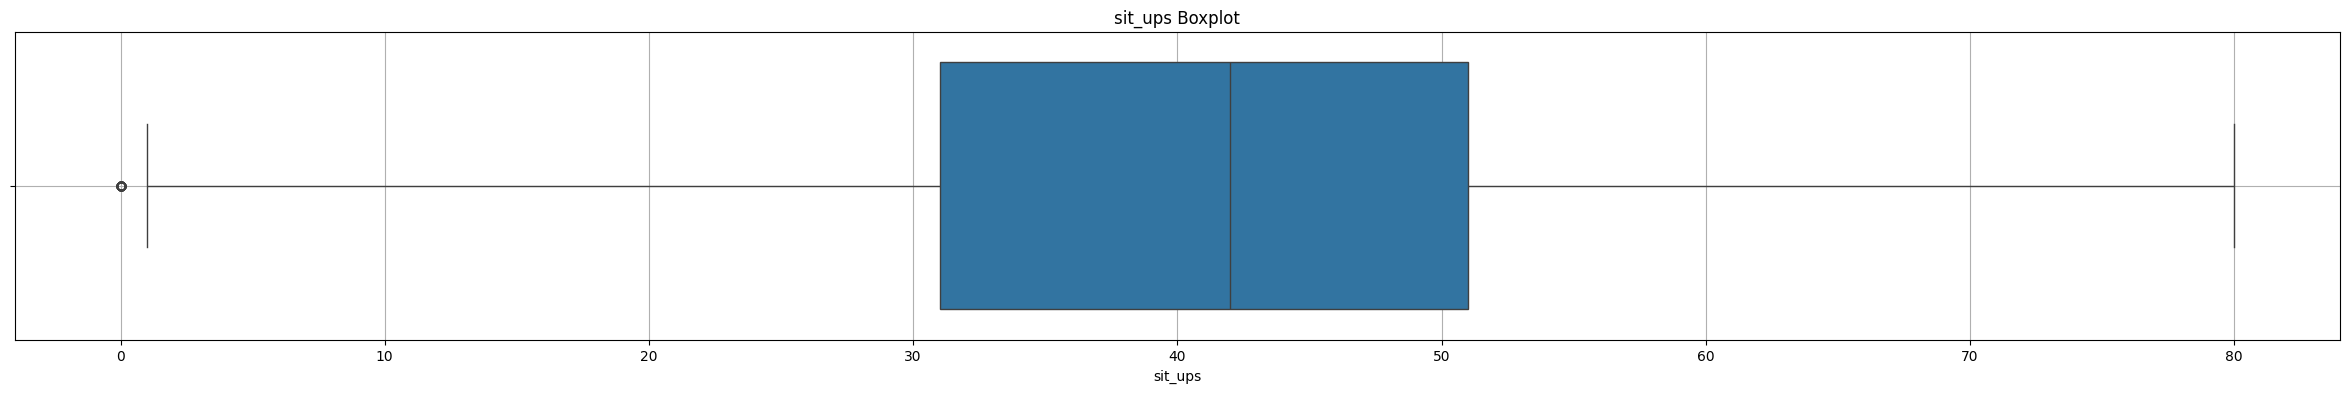

In [250]:
plt.figure(figsize=(30, 4))
sns.boxplot(x=df['sit_ups'])

plt.title("sit_ups Boxplot")
plt.xlabel("sit_ups")
plt.grid(True)

plt.show()

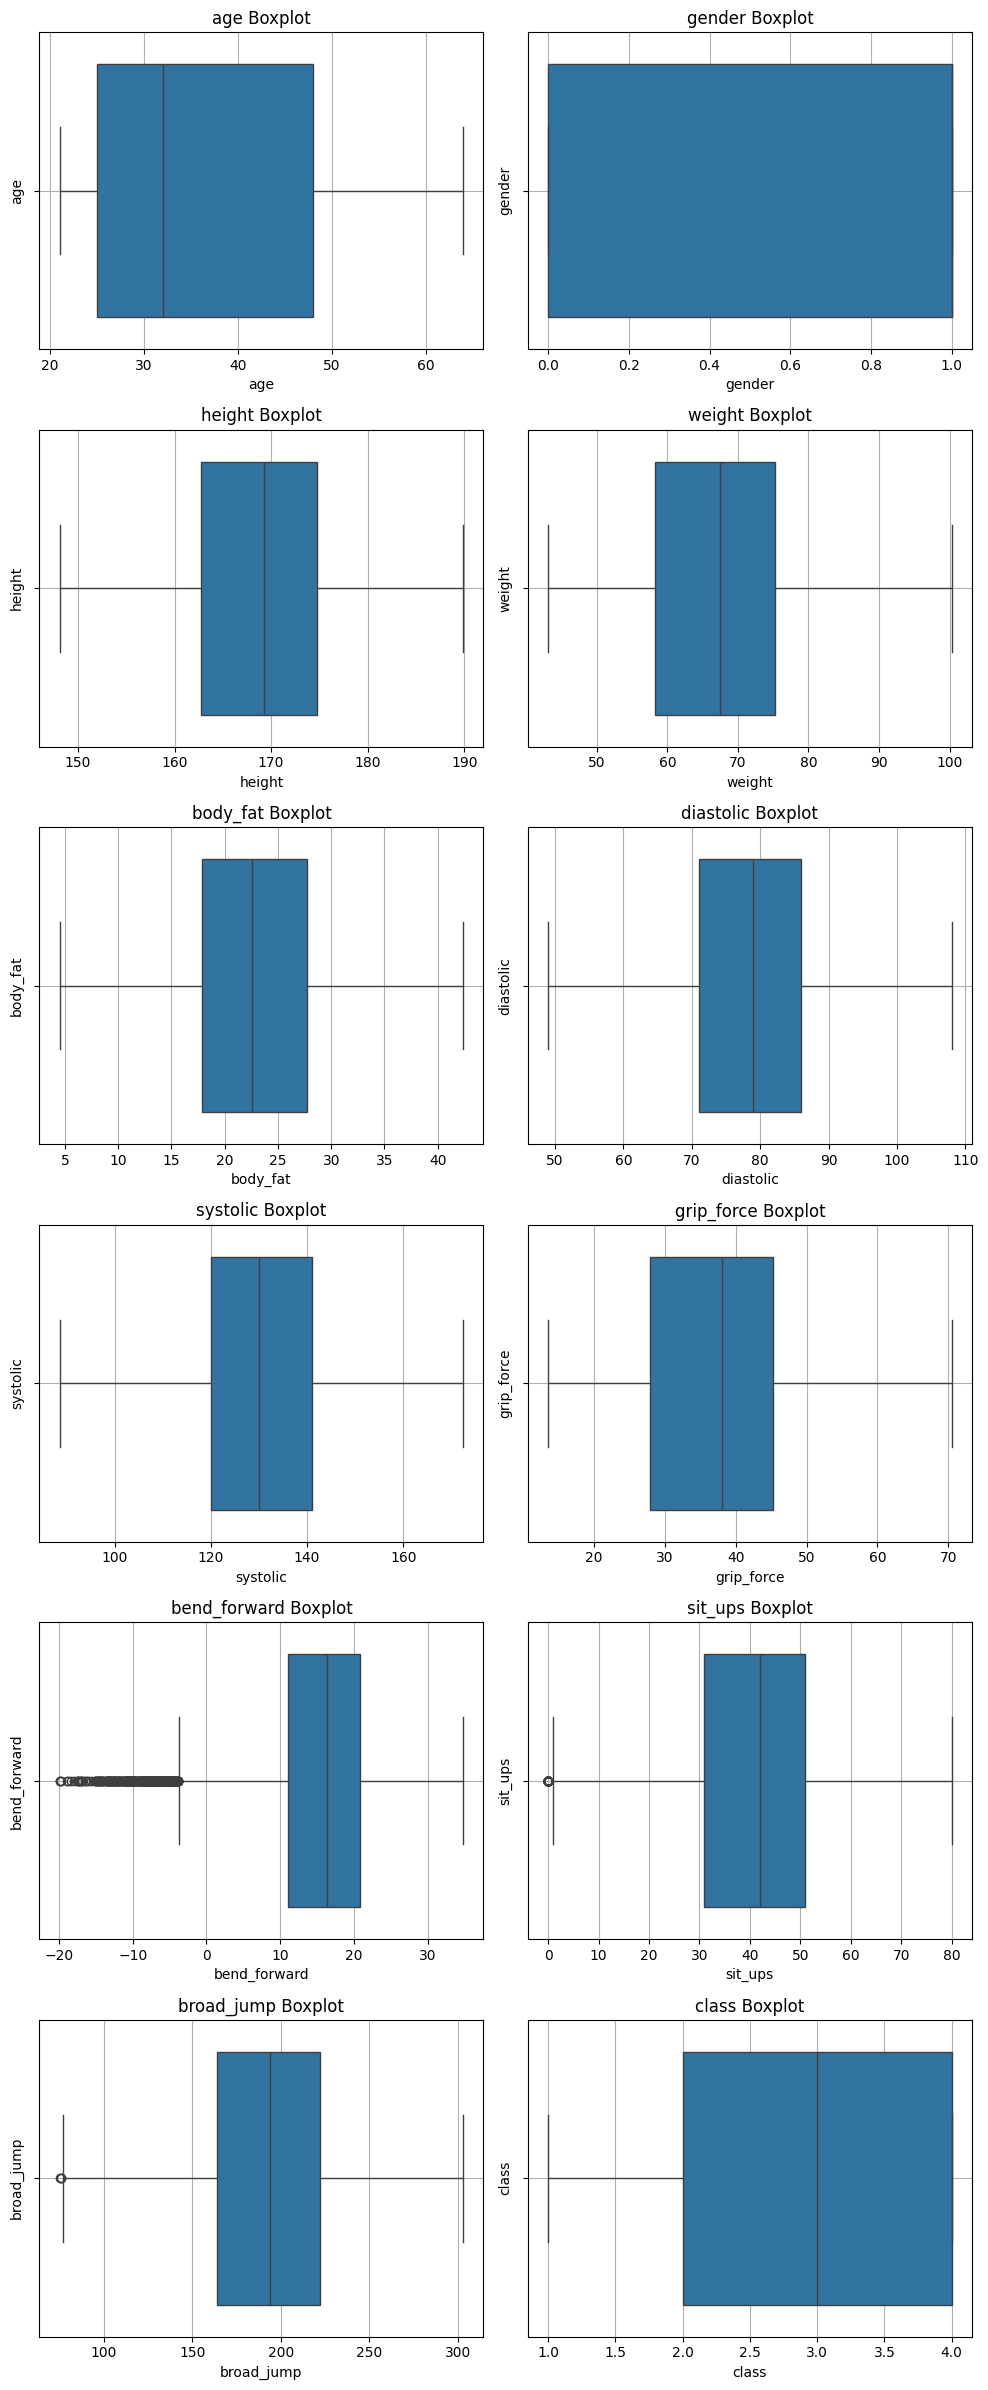

In [251]:
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()
# Her sütun için ayrı boxplot çiz
for i, column in enumerate(df.columns):
    ax = axes[i]
    sns.boxplot(x=df[column], ax=ax)
    ax.set_title(f"{column} Boxplot")
    ax.set_ylabel(column)
    ax.grid(True)

plt.tight_layout()
plt.savefig("numeric_boxplot_graphics_after_data_preprocessing.jpg", format='jpg', dpi=1000)
plt.show()

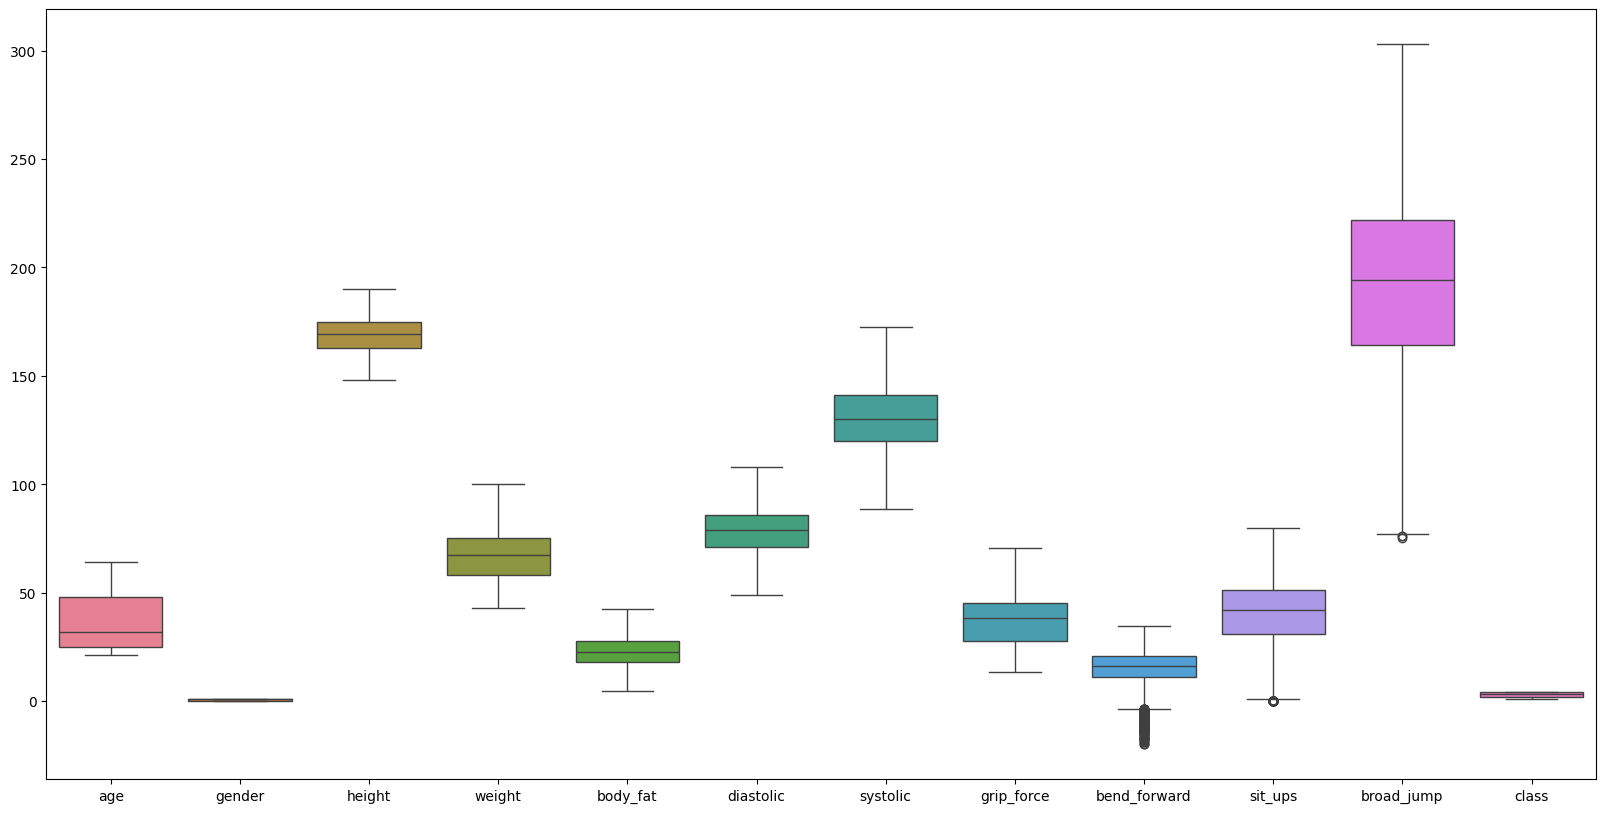

In [252]:
plt.figure(figsize = (20, 10))
sns.boxplot(data = df)
plt.savefig("all_numeric_boxplots_after_data_preprocessing.jpg", format='jpg', dpi=1000)

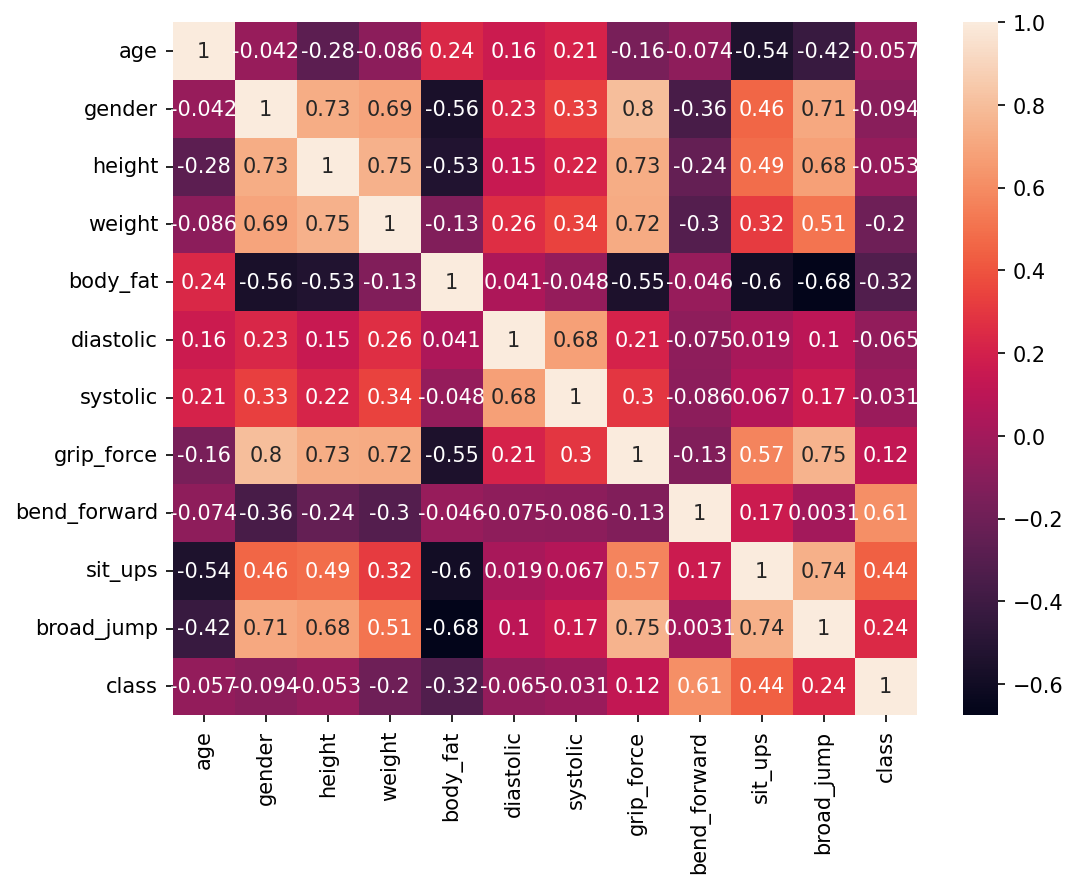

In [253]:
plt.figure(figsize=(8,6),dpi = 150)
sns.heatmap(df.corr(),annot = True)
plt.savefig("numeric_correlation_table_after_data_preprocessing.jpg", format='jpg', dpi=1000)


/var/folders/sg/010p4dys4cn4m_5nl427sxpc0000gn/T/ipykernel_40399/888339193.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=column, hue=class_column, common_norm=False, fill=True, ax=ax)


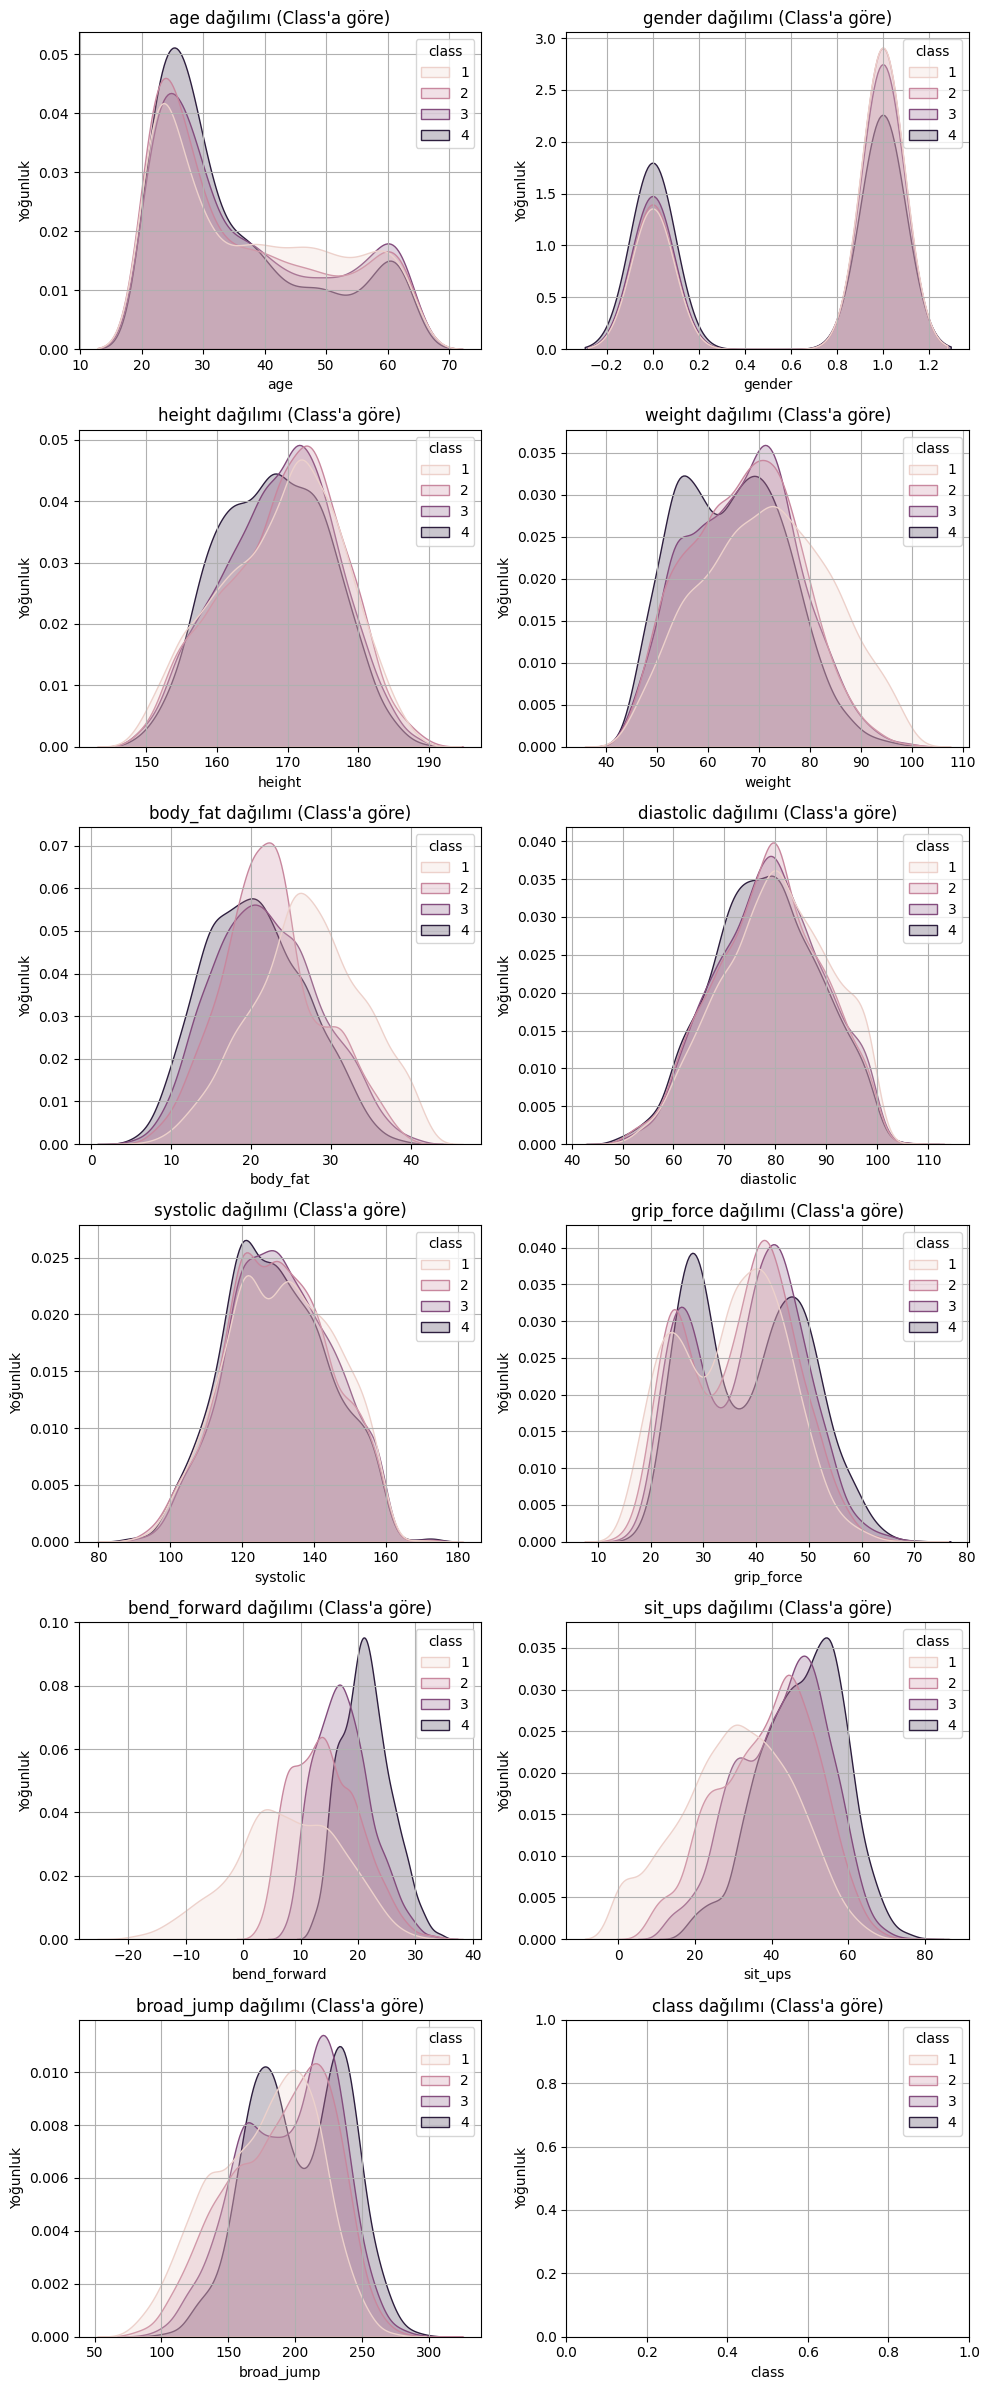

In [254]:
#class adlı kolona göre
class_column = 'class' 

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    ax = axes[i]
    sns.kdeplot(data=df, x=column, hue=class_column, common_norm=False, fill=True, ax=ax)
    ax.set_title(f"{column} dağılımı (Class'a göre)")
    ax.set_xlabel(column)
    ax.set_ylabel('Yoğunluk')
    ax.grid(True)


plt.tight_layout()
plt.savefig("class_grouped_density_plots_after_data_preprocessing.jpg", format='jpg', dpi=300)
plt.show()


In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12945 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           12945 non-null  float64
 1   gender        12945 non-null  int64  
 2   height        12945 non-null  float64
 3   weight        12945 non-null  float64
 4   body_fat      12945 non-null  float64
 5   diastolic     12945 non-null  float64
 6   systolic      12945 non-null  float64
 7   grip_force    12945 non-null  float64
 8   bend_forward  12945 non-null  float64
 9   sit_ups       12945 non-null  float64
 10  broad_jump    12945 non-null  float64
 11  class         12945 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 1.3 MB


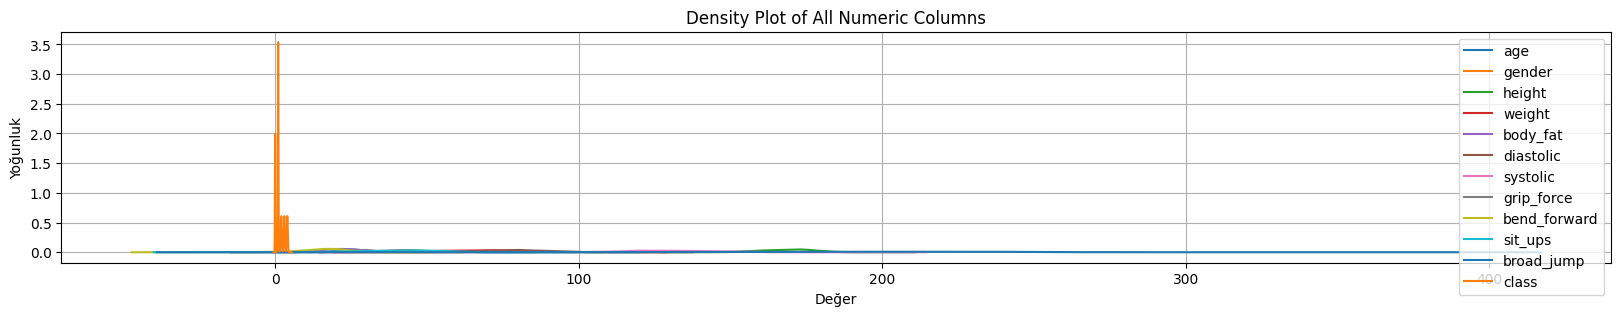

In [256]:
#dataframe in yoğunluk eğrisini inceleyelim
plt.figure(figsize=(20, 3))  # Grafik boyutu
for column in df.columns:
    df[column].plot(kind='kde', label=column)

plt.title('Density Plot of All Numeric Columns')
plt.xlabel('Değer')
plt.ylabel('Yoğunluk')
plt.legend()
plt.grid(True)
plt.savefig("density_plot_after_data_preprocessing.jpg", format='jpg', dpi=1000)
plt.show()

In [257]:
df.head()

,age,gender,height,weight,body_fat,diastolic,systolic,grip_force,bend_forward,sit_ups,broad_jump,class
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,4
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,3
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,3


In [258]:
df.to_csv("cleaned_data.csv", index=False)


# LightGBM Modelling

In [259]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import lightgbm as lgb

In [260]:
X = df.drop(columns=['class'])  # class hedef değişken
y = df['class']

In [261]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [262]:
model = lgb.LGBMClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000346 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1733
[LightGBM] [Info] Number of data points in the train set: 10356, number of used features: 11
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294


LGBMClassifier(class_weight='balanced', random_state=42)

In [263]:
y_pred = model.predict(X_test)  # scale ettiysen X_test_scaled kullan
acc = accuracy_score(y_test, y_pred)

print(f"LightGBM Model Accuracy: {acc:.5f}")


LightGBM Model Accuracy: 0.75628


LightGBM Model Accuracy: 0.75628

In [264]:
df['predicted_class'] = model.predict(X)

In [265]:
print(df[['predicted_class']].head(10))


   predicted_class
0                4
1                4
2                2
3                3
4                3
5                3
6                1
7                3
8                2
9                3


In [266]:
df['actual_class'] = y
df[['actual_class', 'predicted_class']].head(10)

,actual_class,predicted_class
0,2,4
1,4,4
2,2,2
3,3,3
4,3,3
5,3,3
6,1,1
7,3,3
8,2,2
9,3,3


In [267]:
equal_ratio_count = ((df['actual_class'] / df['predicted_class']) == 1).sum()
equal_ratio_count

np.int64(11401)

In [268]:
df.shape

(12945, 14)

In [269]:
11401/12945

0.8807261490923136

In [270]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)  # %75 civarında verir


0.7562765546543067